#**EMPLOYEE ATTRITION ANALYSIS**

**PROJECT BY -** ASTER NATHAN

**DOMAIN-** HUMAN RESOURCES

**INTRODUCTION**

- Employee attrition data analysis is a critical endeavor in the realm of human resources and organizational management. This process involves the systematic examination of data related to employee turnover within a company, aiming to uncover patterns, identify contributing factors, and gain actionable insights. - By leveraging various datasets encompassing employee demographics, performance metrics, job satisfaction surveys, and other relevant variables, organizations can delve into the root causes of attrition.
- The insights derived from this analysis play a pivotal role in informing strategic decisions, implementing targeted retention strategies, and fostering a work environment conducive to employee satisfaction and long-term commitment.
- In an era where talent retention is paramount for organizational success, employee attrition data analysis serves as a powerful tool for understanding workforce dynamics and shaping effective human resource management practices.

**PROBLEM STATEMENT**

- XYZ company which was established a few years back is facing around a 15% attrition rate for a couple of years. And it's majorly affecting the company in many aspects.
- In order to understand why employees are leaving the company and reduce the attrition rate XYZ company has approached an HR analytics consultancy for analyzing the data they have.
- You are playing the HR analyst role in this project and building a dashboard which can help the organization in making data-driven decisions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Attrition data 1.csv')

In [ ]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.shape

(4410, 29)

In [ ]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [ ]:
#FILLING THE NULL VALUES WITH mode() AND median()
#IN ORDER TO FILL THE QUANTITATIVE VALUES, WE NEED TO FILL IT WITH THE mode() VALUES
df['NumCompaniesWorked'].fillna(df['NumCompaniesWorked'].mode()[0],inplace = True)

#IN ORDER TO FILL THE QUALITATIVE VALUES, WE NEED TO FILL IT WITH THE median() VALUES
df['TotalWorkingYears'].fillna(df['TotalWorkingYears'].median(),inplace = True)
df['EnvironmentSatisfaction'].fillna(df['EnvironmentSatisfaction'].median(),inplace = True)
df['JobSatisfaction'].fillna(df['JobSatisfaction'].median(),inplace = True)
df['WorkLifeBalance'].fillna(df['WorkLifeBalance'].median(),inplace = True)

In [ ]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [ ]:
df.select_dtypes(include = 'object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
dtype: int64

In [ ]:
df = df.drop('Over18',axis = 1)

In [ ]:
df.describe(exclude = 'object')

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.687528,15.209524,8.0,...,11.277324,2.799320,7.008163,2.187755,4.123129,2.725170,2.729478,2.763492,2.729932,3.153741
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.495967,3.659108,0.0,...,7.774490,1.288978,6.125135,3.221699,3.567327,1.089852,1.098904,0.703541,0.711400,0.360742
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [ ]:
df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,3699,3129,2883,1818,2646,978,2019


In [ ]:
for col in df.describe(include = 'object'):
  print(col)
  print(df[col].unique())
  print('-'*50)

Attrition
['No' 'Yes']
--------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
--------------------------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
--------------------------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
--------------------------------------------------
Gender
['Female' 'Male']
--------------------------------------------------
JobRole
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
--------------------------------------------------
MaritalStatus
['Married' 'Single' 'Divorced']
--------------------------------------------------


# **EDA (EXPLORATORY DATA ANALYSIS)**

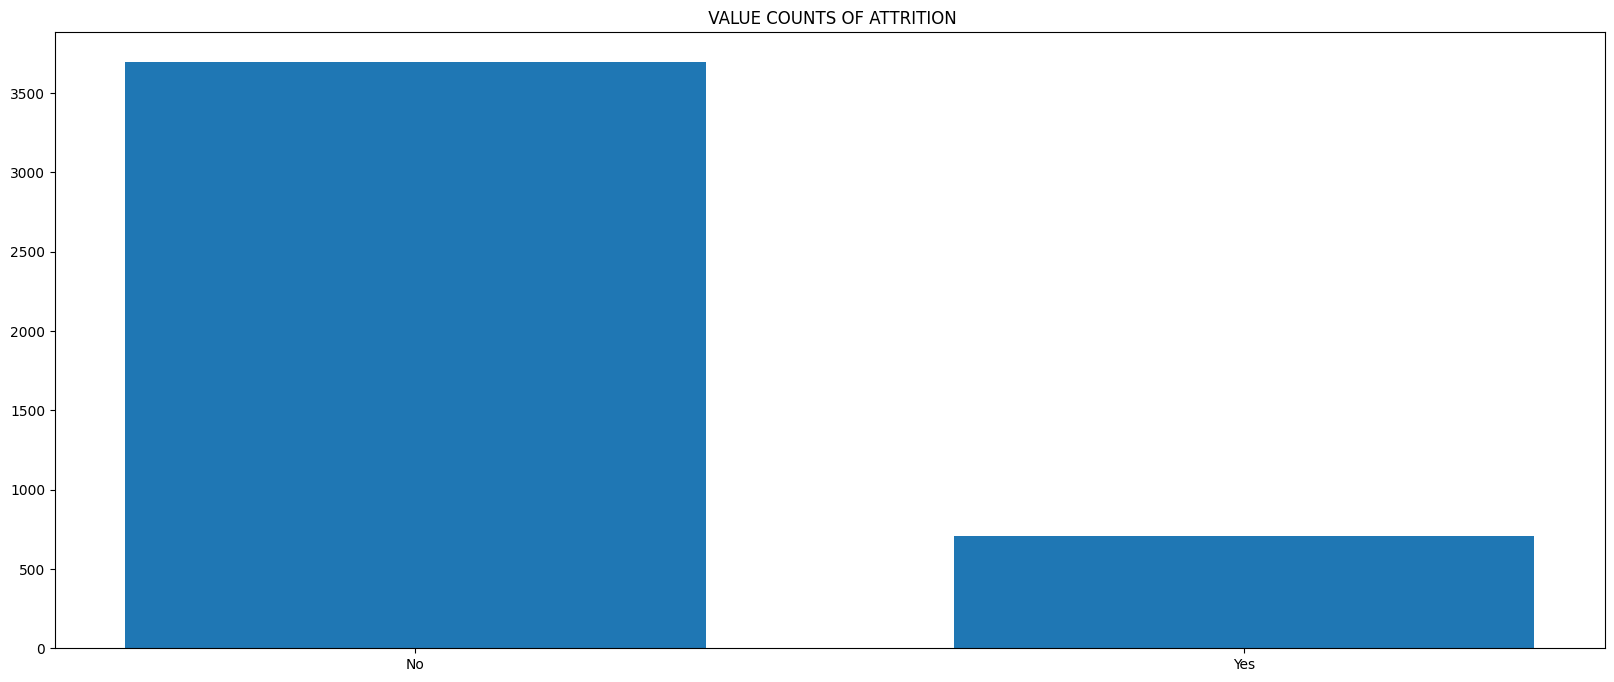

In [ ]:
plt.figure(figsize =(20,8))
plt.title(' VALUE COUNTS OF ATTRITION')
plt.bar(['No','Yes'],df['Attrition'].value_counts(), width = 0.7)
plt.show()

**VALUE COUNTS OF ATTRITION:**

The general Attrition Rate by the organization shows that approximately 83% of the Employee were retained and only 17% of the Employees Left the Organization

<BarContainer object of 43 artists>

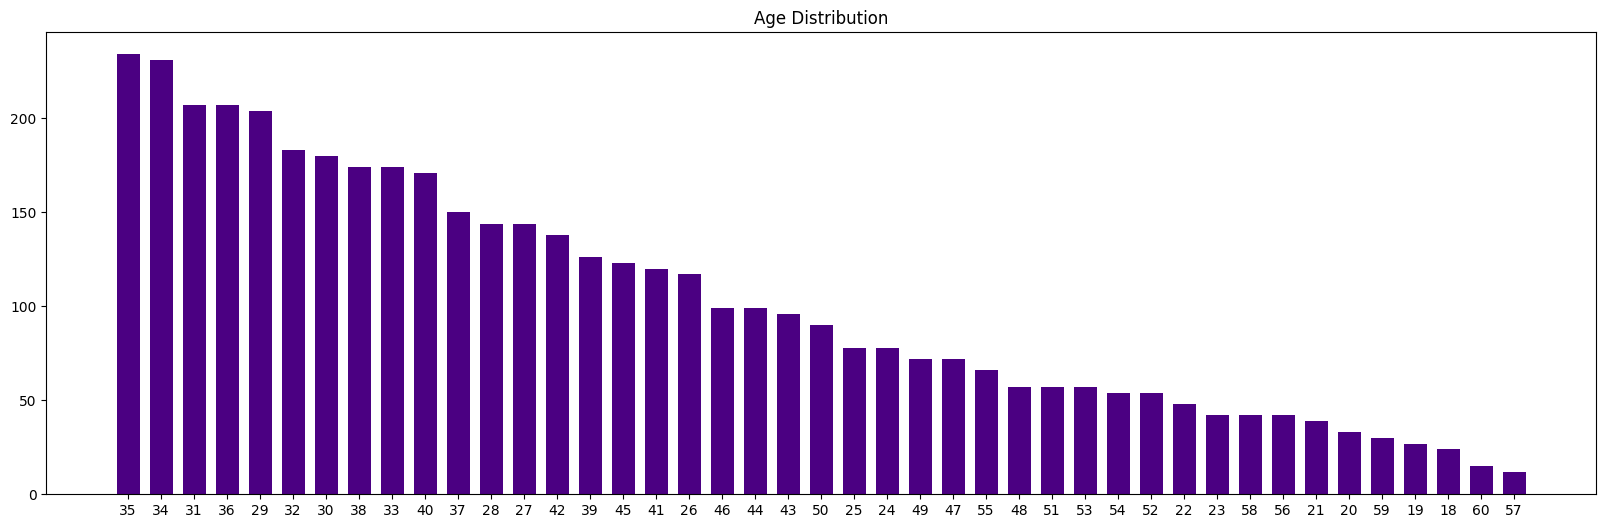

In [ ]:
plt.figure(figsize = (20,6))
plt.title('Age Distribution')
plt.bar(['35', '34', '31', '36', '29', '32', '30', '38', '33', '40', '37', '28',
         '27', '42', '39', '45', '41', '26', '46', '44','43', '50', '25', '24',
         '49', '47', '55', '48', '51', '53', '54', '52', '22', '23', '58', '56',
         '21', '20', '59', '19', '18', '60', '57']
        ,df['Age'].value_counts(),width = 0.7, color = 'indigo')

**AGE DISTRIBUTION OF THE EMPLOYEES WITH THE ORGANIZATION:**

1. The Employees who work within the organization have an Average age of 36.
2. The most count of Employees range from ages 29 - 40.
3. The least count of Employees within XYZ organization are the Entry Level Employees and the Senior Tenured Employees with ages ranging from 18-20 and 55-60.


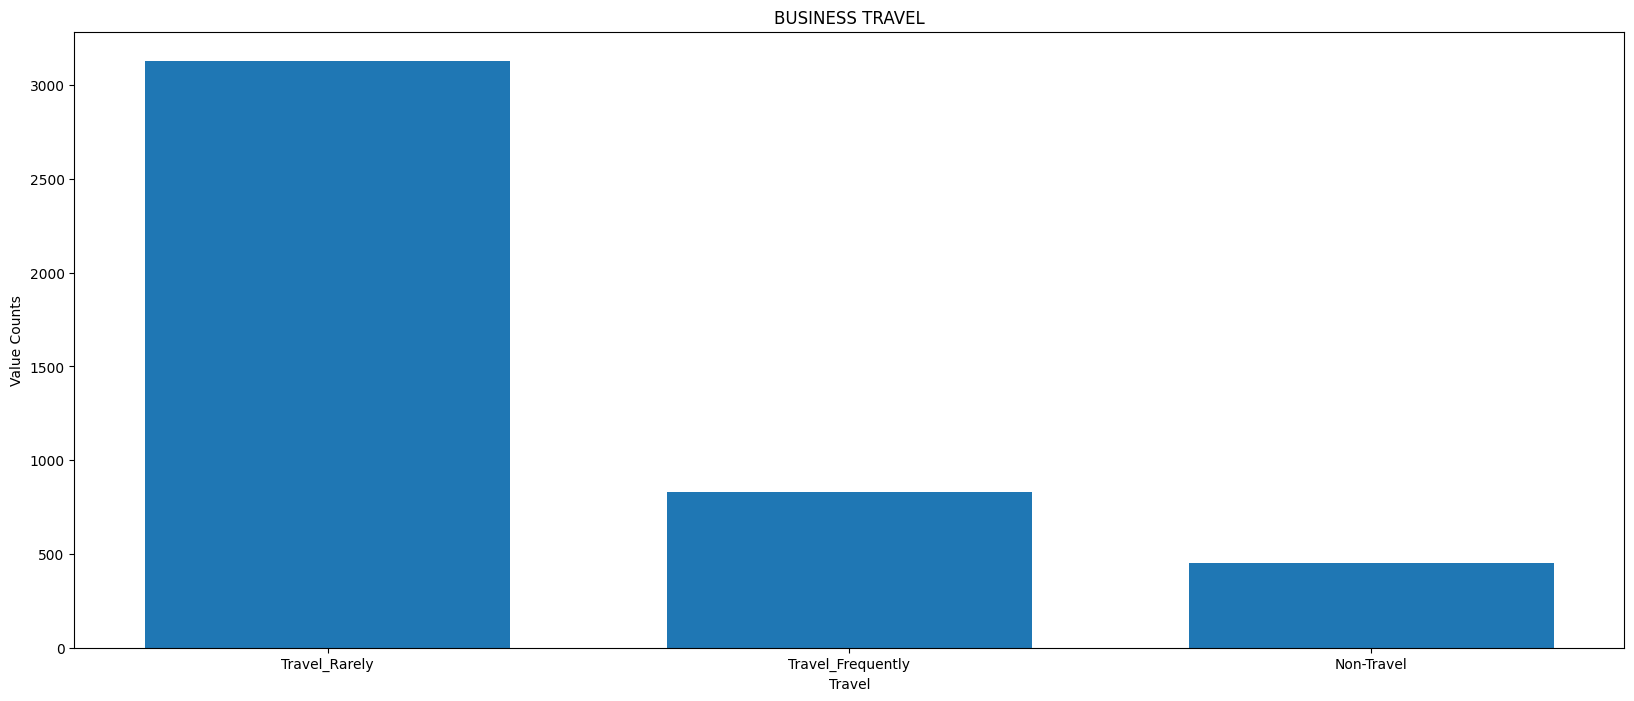

In [ ]:
plt.figure(figsize = (20,8))
plt.title('BUSINESS TRAVEL')
plt.bar(['Travel_Rarely','Travel_Frequently','Non-Travel'], df['BusinessTravel'].value_counts(), width = 0.7)
plt.xlabel('Travel')
plt.ylabel('Value Counts')
plt.show()

**THE NEED TO TRAVEL FOR THE EMPLOYEES**

1. Around 70% of the Employees Travel very Rarely to the Job Location, implementing the Hybrid mode setting.
2. 18% of the Employees Travel Frequently.
3. Only 10 % of the Employees work Remotely

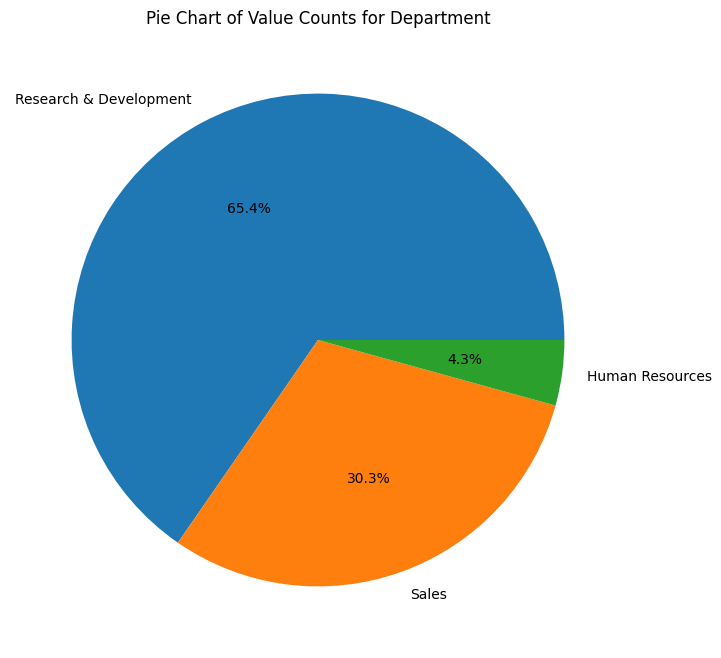

In [ ]:
department_counts = df["Department"].value_counts()
plt.figure(figsize = (20,8))
plt.pie(department_counts.values, labels=department_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Value Counts for Department")
plt.show()

**THE EMPLOYEES DISTRIBUTED ACCROSS DEPARTMENTS WITHIN THE ORGANIZATION**

1. More than 65% of the Employees within the Organization belong to the Research and Development Department.
2. 30% of the Employees belong to the Sales Department.
3. Only 4.3% of the Employees belong to the Human Resources Department

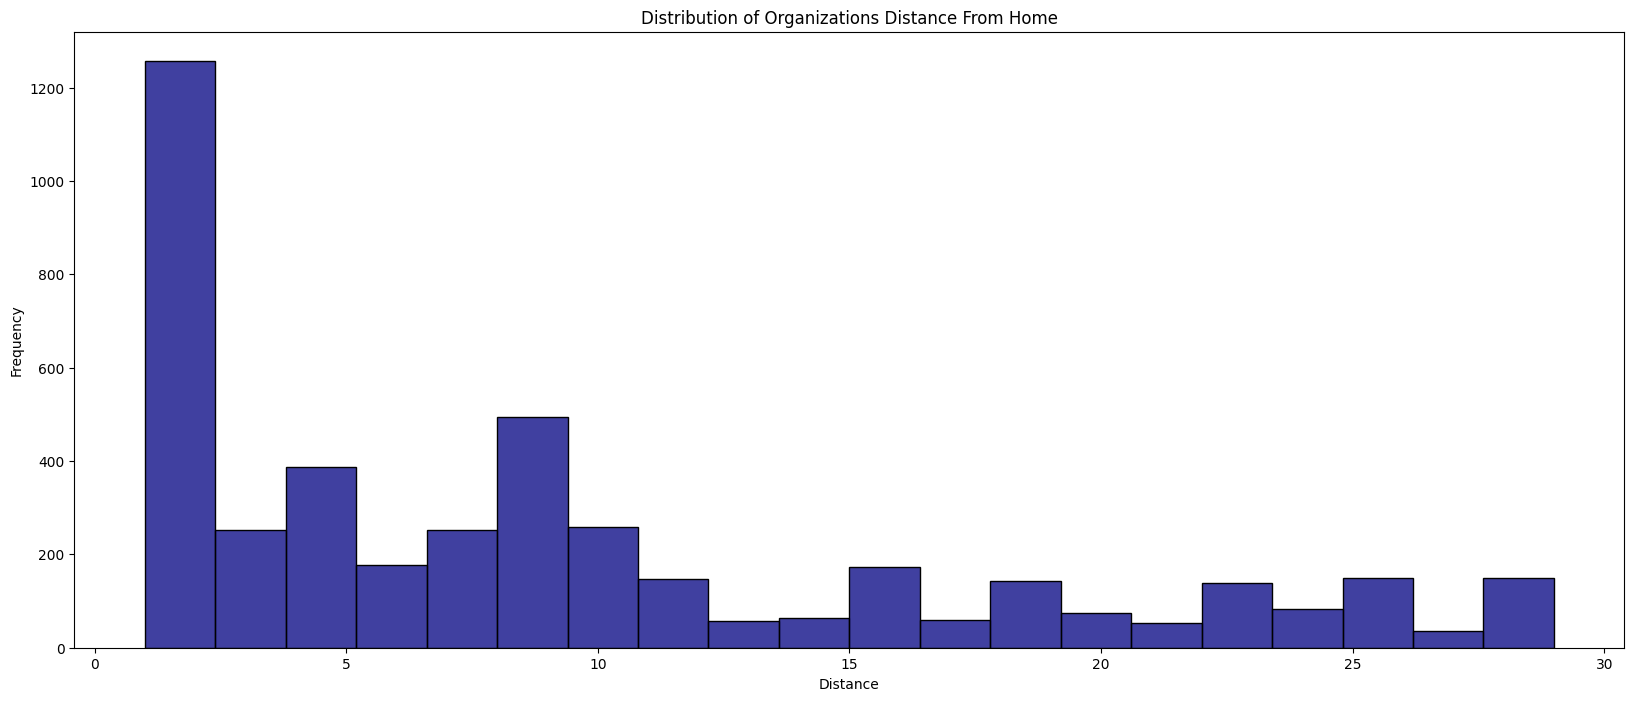

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(df["DistanceFromHome"], color = 'navy')
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.title("Distribution of Organizations Distance From Home")
plt.show()

**DISTRIBUTION OF THE ORGANIZATIONS DISTANCE FROM THE EMPLOYEES RESIDENCE**

1. The Highest amount of Distribution is observed between 0 to 10 Kilometers radius.
2. Lowest Amount of Distribution is observed between 10 to 30 Kilometers.

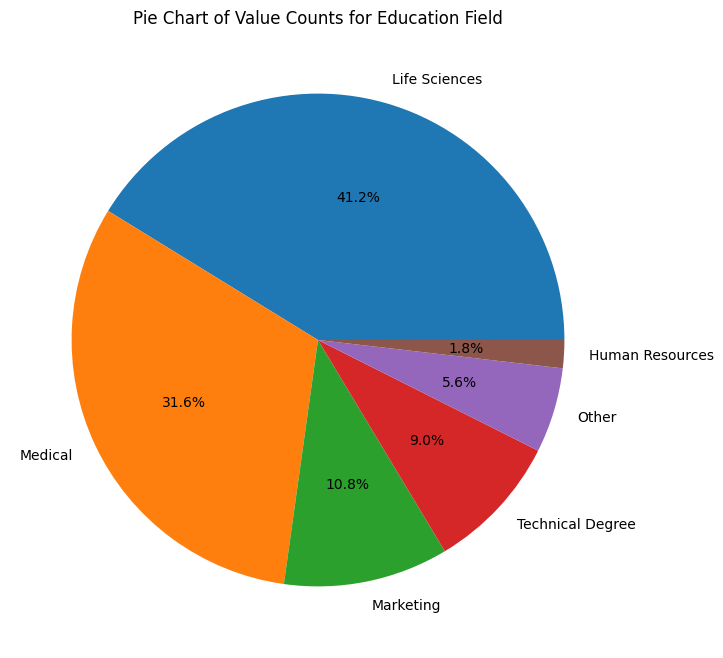

In [ ]:
edu_counts = df["EducationField"].value_counts()
plt.figure(figsize = (20,8))
plt.pie(edu_counts.values, labels=edu_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Value Counts for Education Field")
plt.show()

**THE EDUCATION FIELD OF THE EMPLOYEES WORKING IN THE ORGANIZATION**

1. More than 41% of the Employees come from the Life Sciences field.
2. Around 32% of the Employees belong from the Medical field.
3. 10% of the Employees belong to the Marketing field.
4. 9% of the Employees have a Technical Degree.
5. Approximately 6% come from Other Education background.
6. Only 1.8% of the Employees have completed their Education in the Human Resources field.

Text(0.5, 1.0, 'Gender')

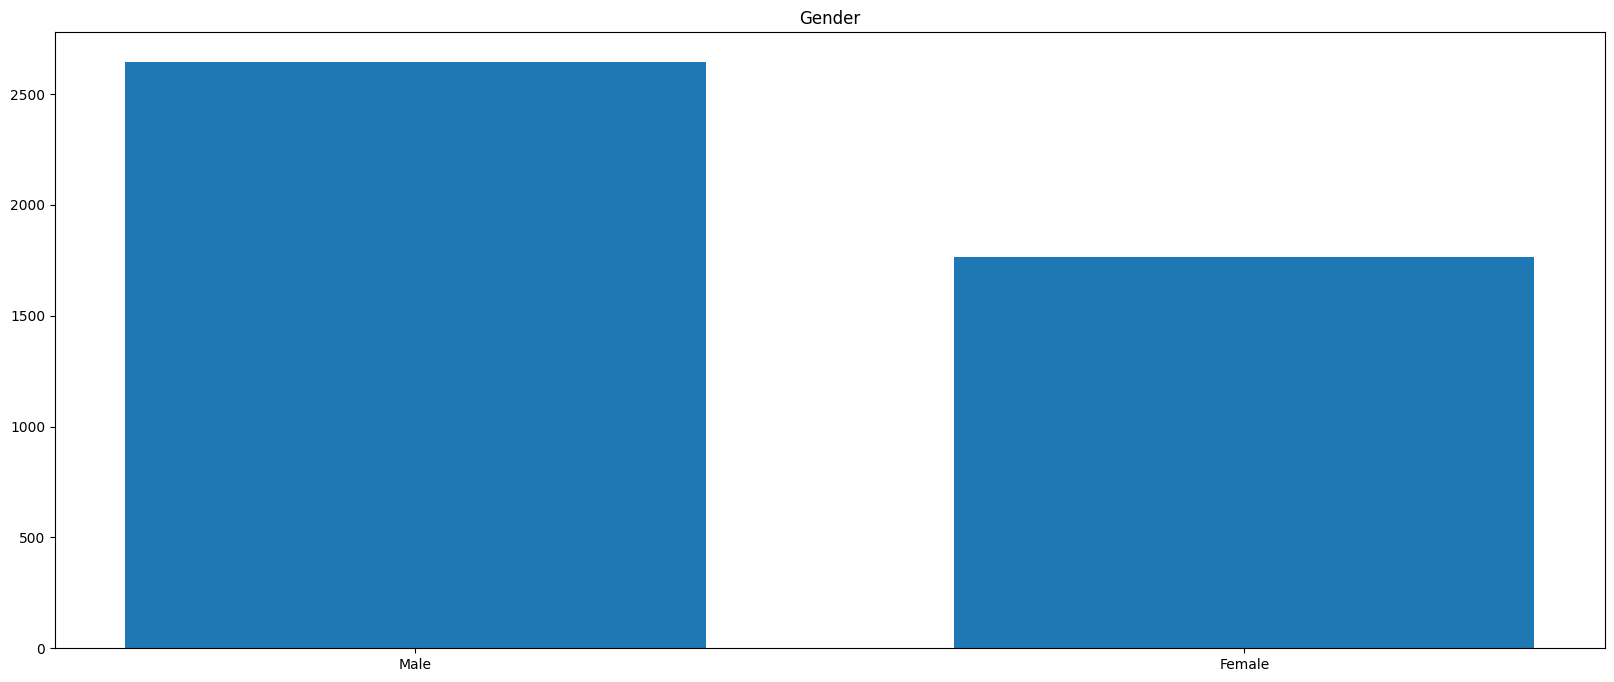

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['Male','Female'],df['Gender'].value_counts(), width = 0.7)
plt.title('Gender')

**THE GENDER DISTRIBUTION BETWEEN THE EMPLOYEES**

1. 60% of the Employees working within the organization are Male.
2. 40% of the Employees working within the organization are Female.

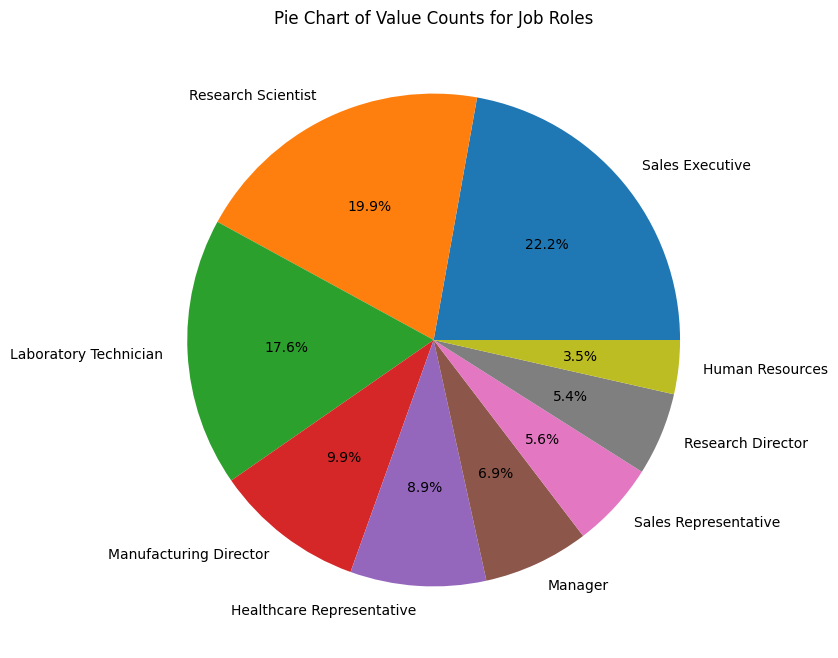

In [ ]:
job_counts = df["JobRole"].value_counts()
plt.figure(figsize = (20,8))
plt.pie(job_counts.values, labels=job_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Value Counts for Job Roles")
plt.show()

**JOB ROLES OF THE EMPLOYEES WITHIN THE ORGANIZATION**

1. The highest distribution of the Employees within the organization is of a Sales Executive with 22.2%.
2. Research Scientist had the second highest distribution of 19.9%.
3. Laboratory Technician had the third highest distribution of 17.6%.
4. Manufacturing Director had 9.9% of the distribution.
5. Healthcare Representative had 8.9% of the distribution.
6. Manager had a distrubution of 6.9%.
7. Sales Representative contributed to 5.6% of the distribution.
8. Research Director had the second least distribution of 5.4%.
9. The Human Resources employees had the least distribution of 3.5%.

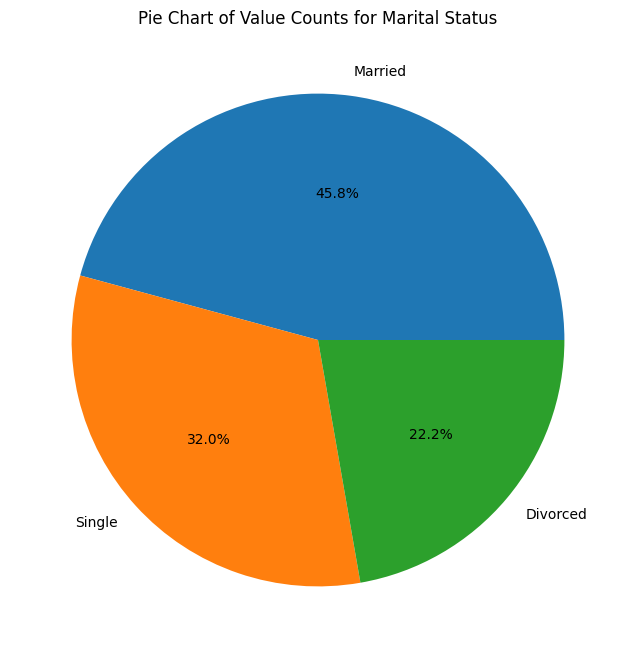

In [ ]:
marital_counts = df["MaritalStatus"].value_counts()
plt.figure(figsize = (20,8))
plt.pie(marital_counts.values, labels=marital_counts.index, autopct="%1.1f%%")
plt.title("Pie Chart of Value Counts for Marital Status")
plt.show()

**THE VALUE COUNTS FOR MARITAL STATUS ARE AS FOLLOWS:**

1. There are more than 45% Married Employees within the organization.
2. 32% of the Employees are Single.
3. 22.2% of the Employees are Divorced

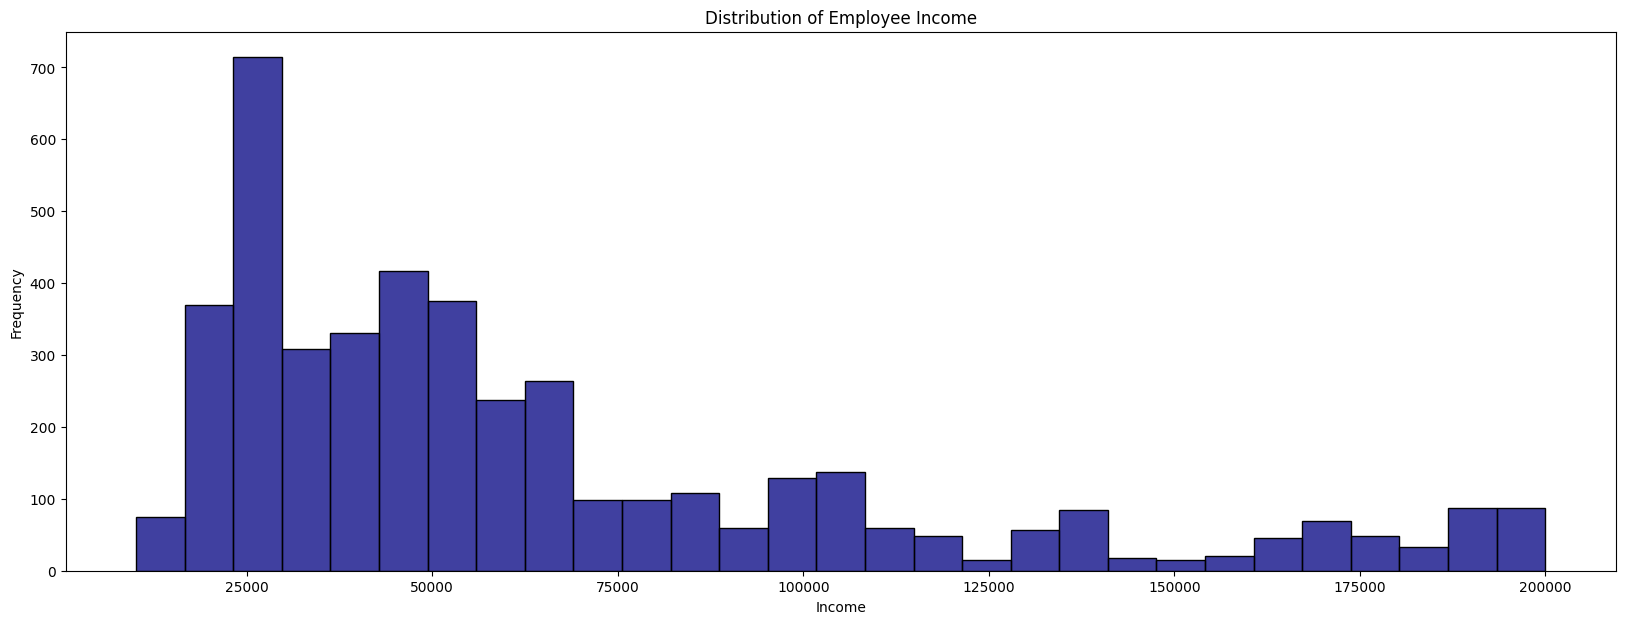

In [ ]:
plt.figure(figsize = (20,7))
sns.histplot(df["MonthlyIncome"], color = 'navy')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Distribution of Employee Income")
plt.show()

**THE DISTRIBUTION OF THE EMPLOYEES SALARY**

1. 25K to 50K observed the Highest Distribution.
2. 50K to 75K observed High to Moderate Distribution.
3. 75K to 100K observed Moderate Distribution.
4. 125K to 200K observed comparatively Lower Distribution.

Text(0.5, 1.0, 'COUNT OF COMPANIES WHERE THE EMPLOYEES WORKED PRIOR')

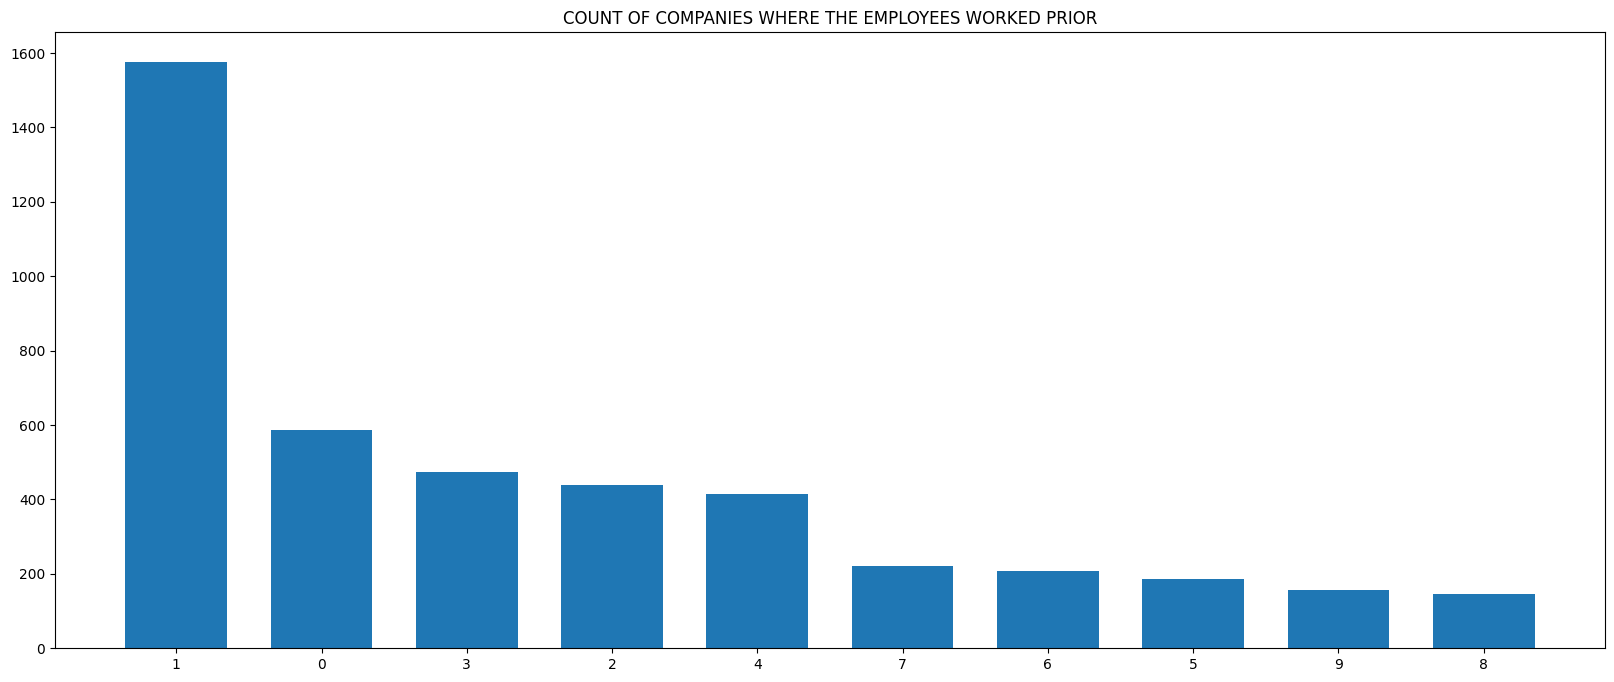

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['1','0','3','2','4','7','6','5','9','8'],df['NumCompaniesWorked'].value_counts(),width = 0.7)
plt.title('COUNT OF COMPANIES WHERE THE EMPLOYEES WORKED PRIOR')

**THE COUNT OF COMPANIES WHERE THE EMPLOYEES WORKED PRIOR**

1. The Highest Count of the Companies where the Employees worked is 1.
2. The Second Highest are the Fresher Employees where the Company Count is 0.
3. Company Counts between 0 to 4 saw a higher distribution.
4. The Second Lowest Count was that of Employees who worked at 9 Distinct organizations.
5. The Lowest Count was the Employees who have worked with 8 Different Organizations.
6. Company counts between 5 to 9 saw the Lowest Employee Count.

Text(0.5, 1.0, 'PERCENT OF SALARY HIKE OF THE EMPLOYEES')

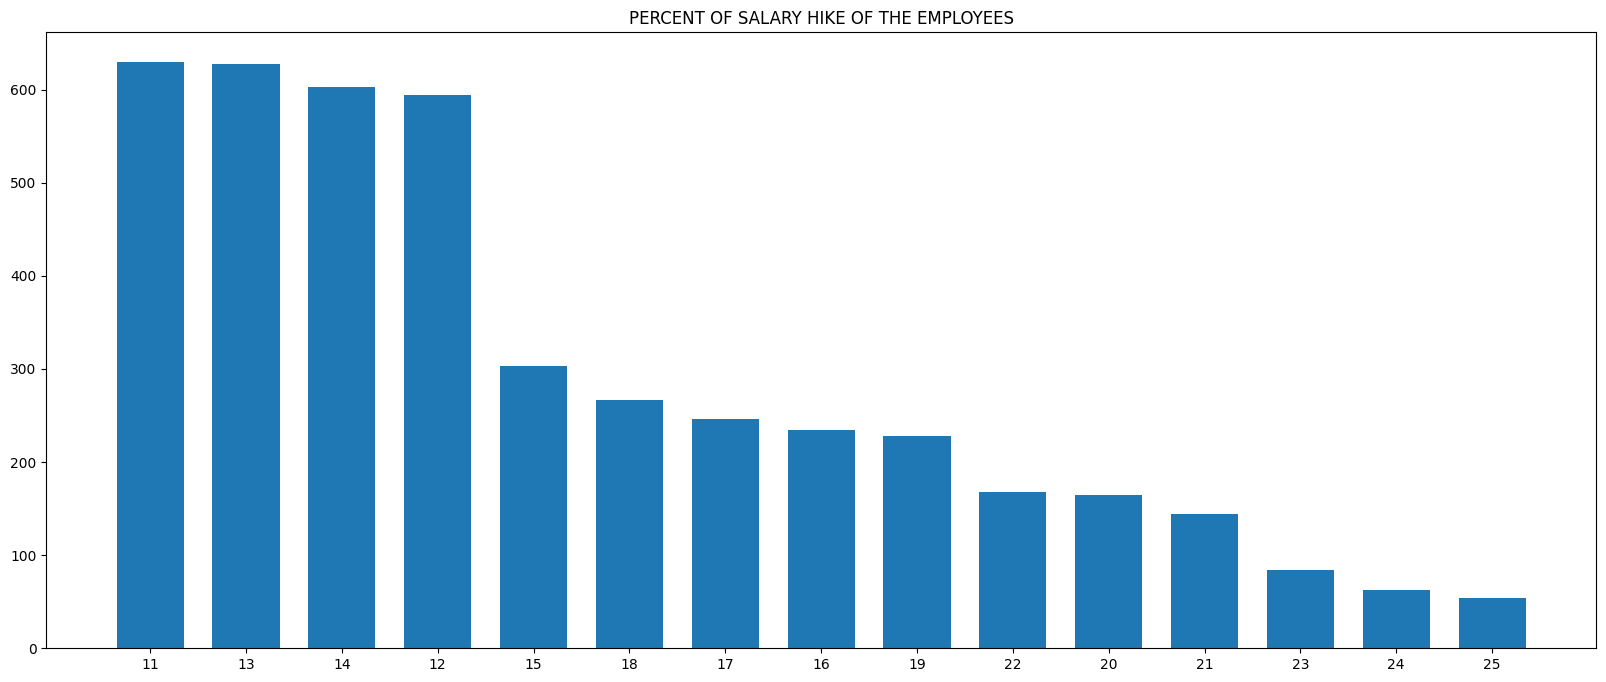

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['11','13','14','12','15','18','17','16','19','22','20','21','23','24','25'],df['PercentSalaryHike'].value_counts(),width = 0.7)
plt.title('PERCENT OF SALARY HIKE OF THE EMPLOYEES')

**VALUE COUNTS OF THE PERCENT OF SALARY HIKE WITHIN THE ORGANIZATION**

1. The Organization saw the Highest Percentage of Salary Hike with 11%.
2. The Highest Distribution was between 11 to 14 Percentages.
3. The Moderate Distribution was between 15-19 Percentages.
4. The Lowest Distribution was observed between the Salary Hikes of 20-25 Percentages.

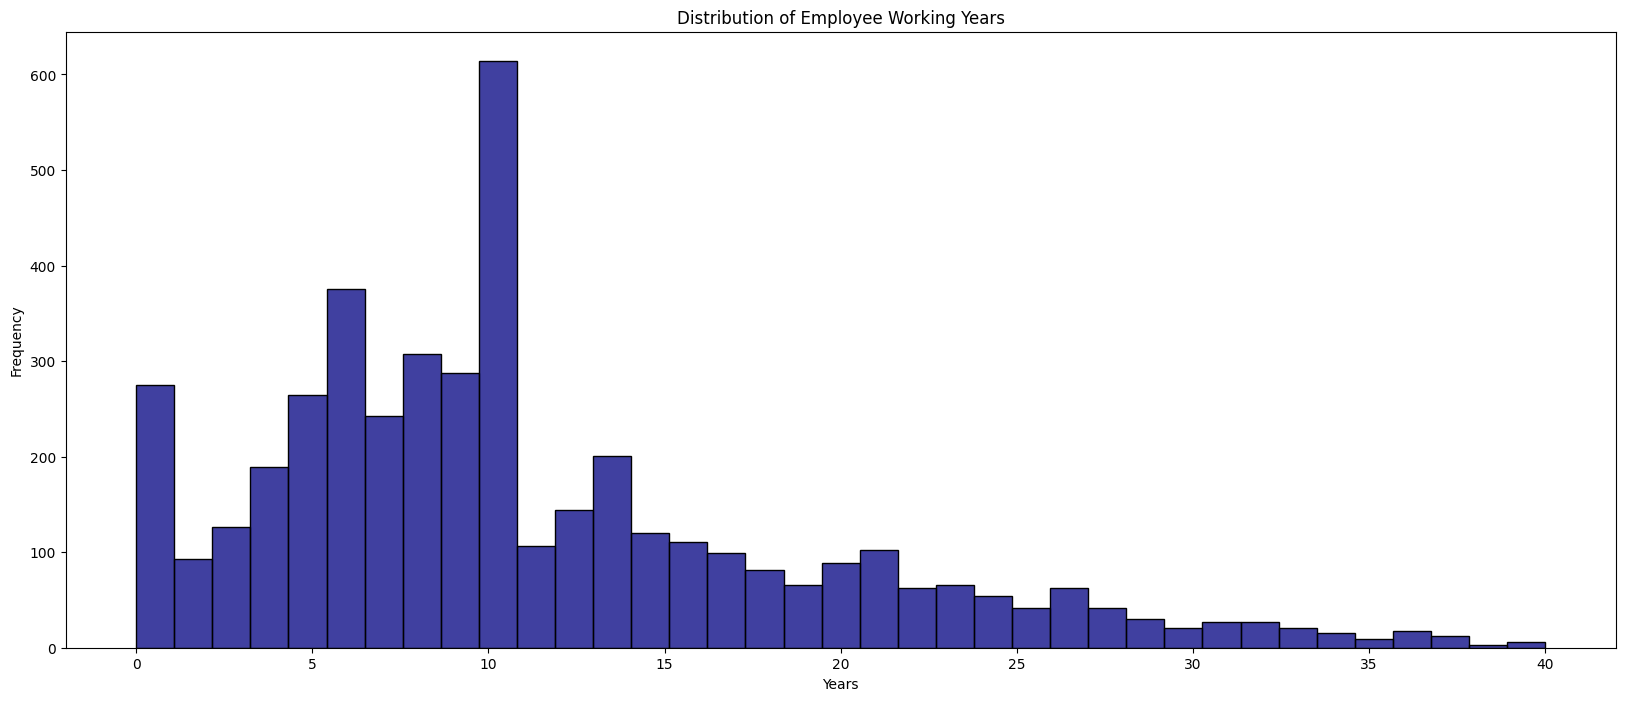

In [ ]:
plt.figure(figsize = (20,8))
sns.histplot(df["TotalWorkingYears"],color = 'navy')
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.title("Distribution of Employee Working Years")
plt.show()

**DISTRIBUTION OF TOTAL WORKING YEARS OF THE EMPLOYEES**

1. The Highest Bar was observed at Employees with 10 Working Years.
2. The Highest Distribution was obeserved between 0 to 10 Working Years.
3. 11 - 20 Working Years observed Moderate Distribution.
4. 21 - 40 Working Years was observed very Less.

Text(0.5, 1.0, 'COUNT OF EMPLOYEES WITHIN THE ORGANIZATION')

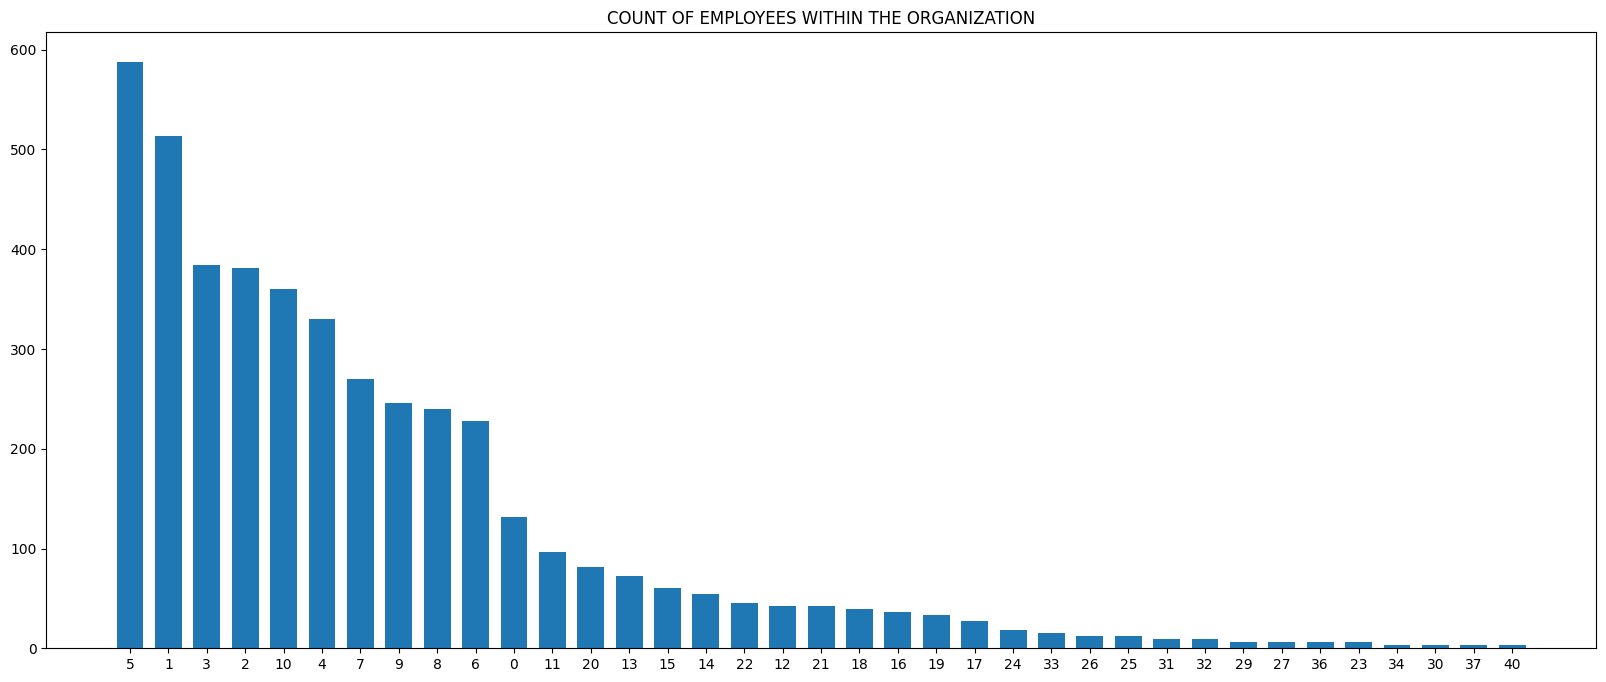

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['5', '1', '3', '2', '10', '4', '7', '9', '8', '6', '0', '11', '20', '13',
         '15', '14', '22', '12', '21', '18', '16', '19', '17', '24', '33', '26', '25',
         '31', '32', '29', '27', '36', '23', '34', '30', '37', '40'],df['YearsAtCompany'].value_counts(),width = 0.7)
plt.title('COUNT OF EMPLOYEES WITHIN THE ORGANIZATION')

**COUNT OF THE YEARS OF EMPLOYEES WORKING WITHIN ORGANIZATON**

1. The Highest Count of the Employees working within the organization is 5 Years.
2. The Highest Distribution was observed within the First 10 years of Completion at the XYZ Organization.
3. The Moderate Distribution was observed were within the 11-20 Years at the Organizaiton.
4. The Lowest Distribution was observed between 20 - 40 Years of Completion.

Text(0.5, 1.0, 'ENVIRONMENT SATISFACTION FOR THE EMPLOYEES')

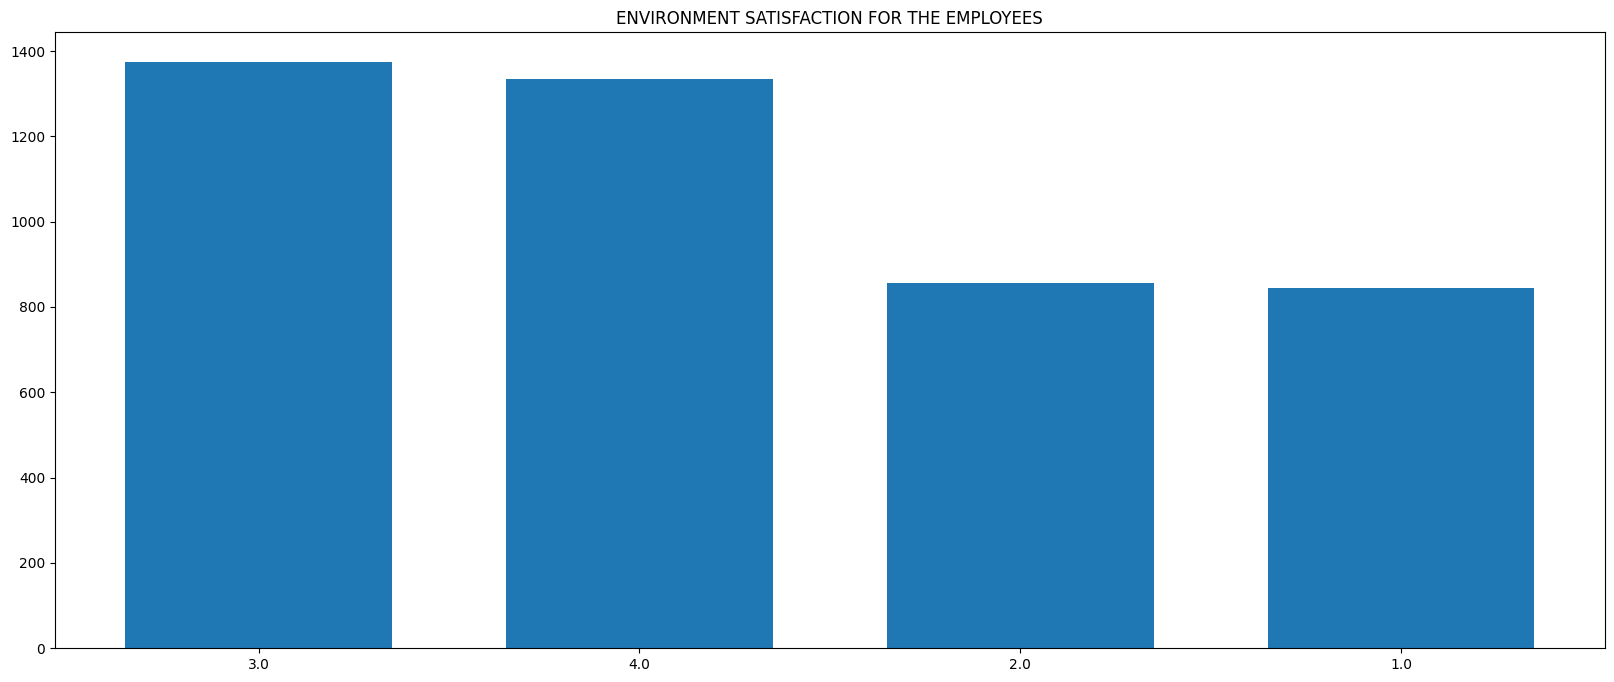

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['3.0','4.0','2.0','1.0'],df['EnvironmentSatisfaction'].value_counts(),width = 0.7)
plt.title('ENVIRONMENT SATISFACTION FOR THE EMPLOYEES')

**ORGANIZATIONS ENVIRONMENT SATISFACTION AS REVIEWED BY THE EMPLOYEES**

1.0 - Poor Environment |
2.0 - Moderate Environment |
3.0 - Good Environment |
4.0 - Excellent Environment |
1. 31% of the Employees reviewed the Job Environment to be Good.
2. 30% of the Employees reviewed the Job Environment to be Excellent.
3. 19% of the Employees reviewed the Job Environment to be Moderate.
4. Another 19% of the Employees reviewed the Job Environment to be Poor.

Text(0.5, 1.0, 'JOB SATISFACTION OF THE EMPLOYEES')

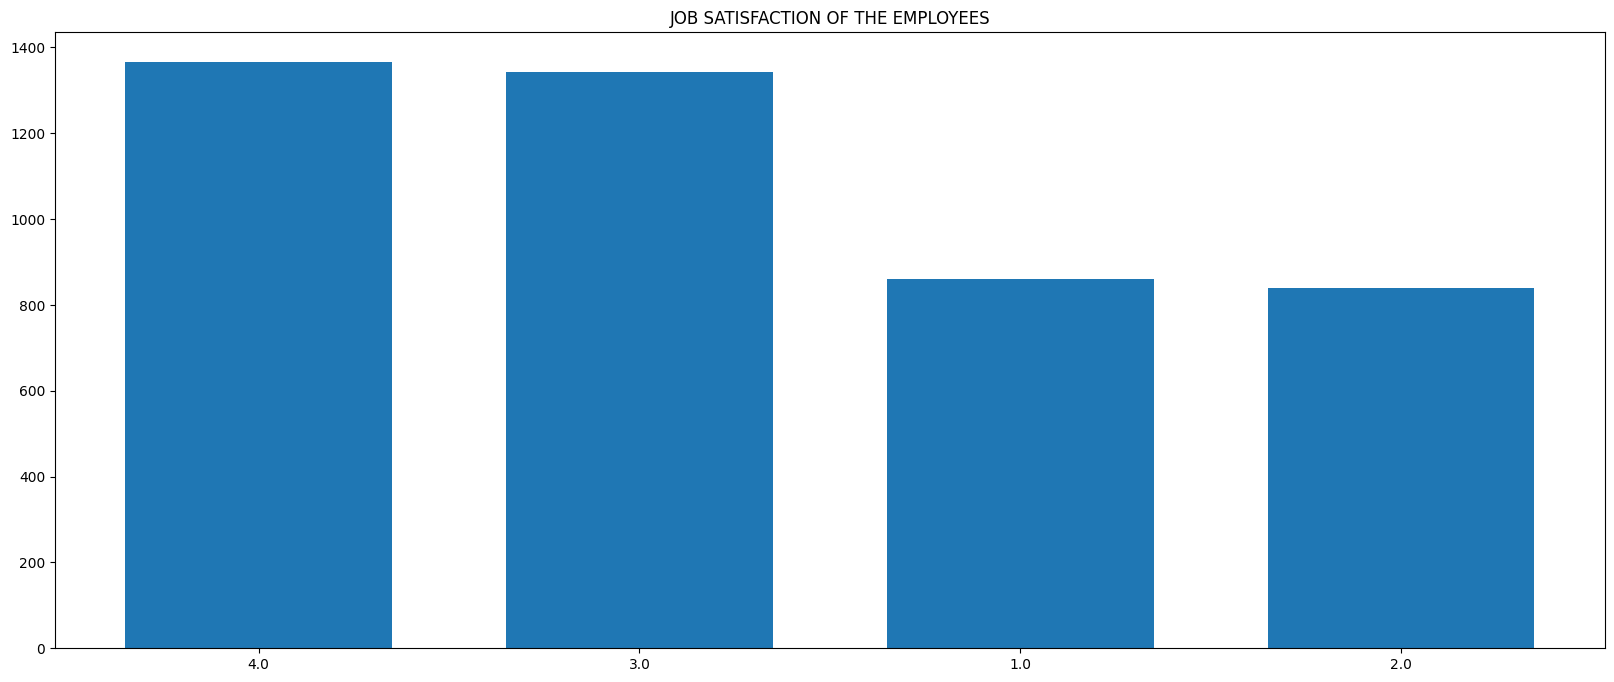

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['4.0','3.0','1.0','2.0'],df['JobSatisfaction'].value_counts(),width = 0.7)
plt.title('JOB SATISFACTION OF THE EMPLOYEES')

**JOB SATISFACTION OF THE EMPLOYEES WORKING IN THEIR CURRENT ROLE**

1. Approximately 31% of the Employees voted the Job Satisfaction to be Excellent.
2. 30% of the Employees voted the Job Satisfaction to be Good.
3. Approximately 20% of the Employees voted the Job Satisfaction to be Poor.
4. 19% of the Employees voted the Job Satisfaction to be Moderate

Text(0.5, 1.0, 'WORK LIFE BALANCE OF THE EMPLOYEES')

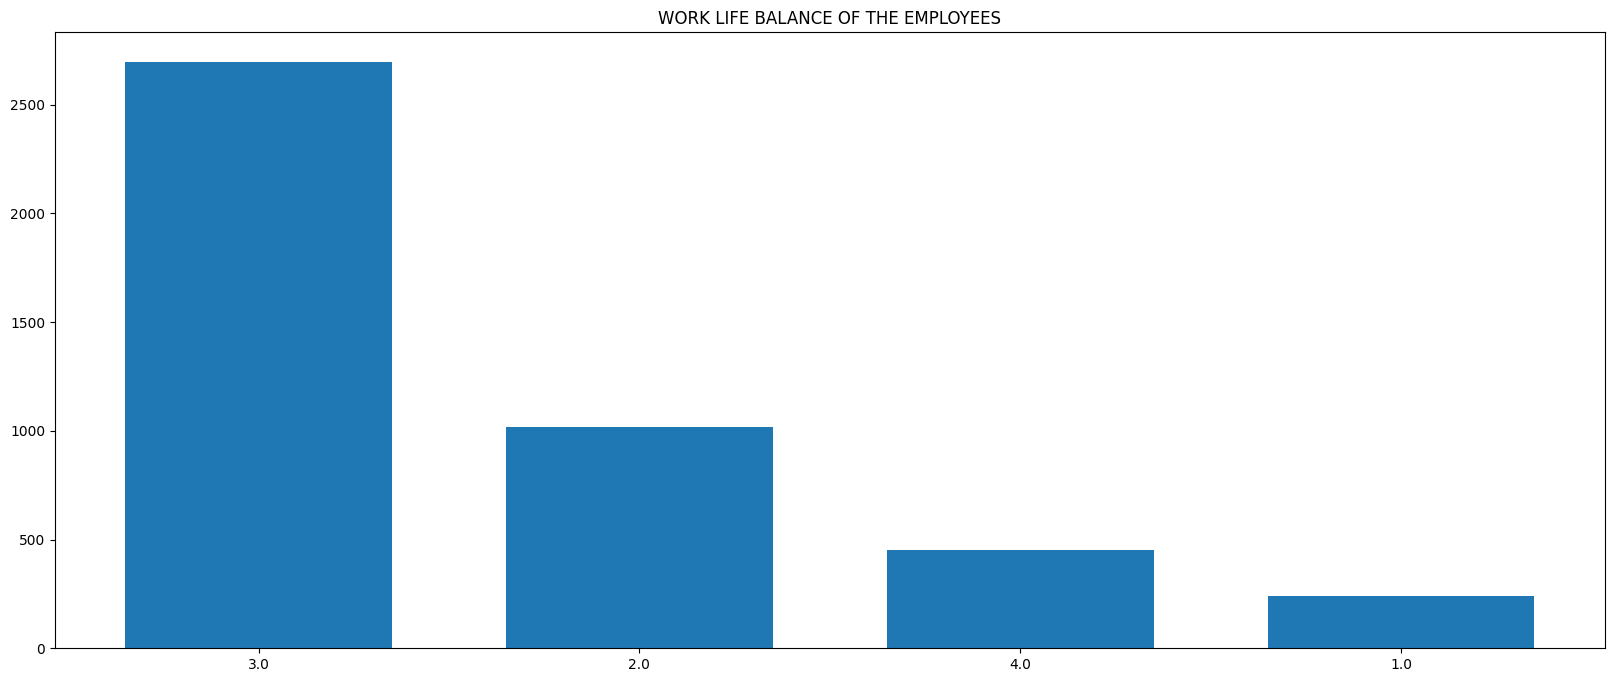

In [ ]:
plt.figure(figsize = (20,8))
plt.bar(['3.0','2.0','4.0','1.0'],df['WorkLifeBalance'].value_counts(),width = 0.7)
plt.title('WORK LIFE BALANCE OF THE EMPLOYEES')

**REVIEW OF THE EMPLOYEES REGARDING WORK-LIFE BALANCE**

1. 61% of the Employees voted their Work Life Balance to be Good.
2. 23% of the Employees voted their Work Life Balance to be Moderate.
3. 10% of the Employees voted their Work Life Balance to be Excellent.
4. Only 5% of the Employees voted their Work Life Balance to be Poor.  

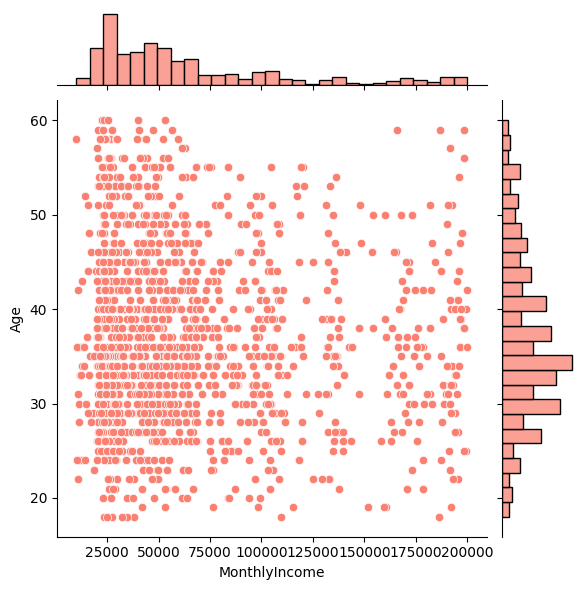

In [ ]:
sns.jointplot(data=df, x="MonthlyIncome", y="Age", color = 'salmon')

# **DATA ANALYSIS** AGAINST THE TARGET VARIABLE

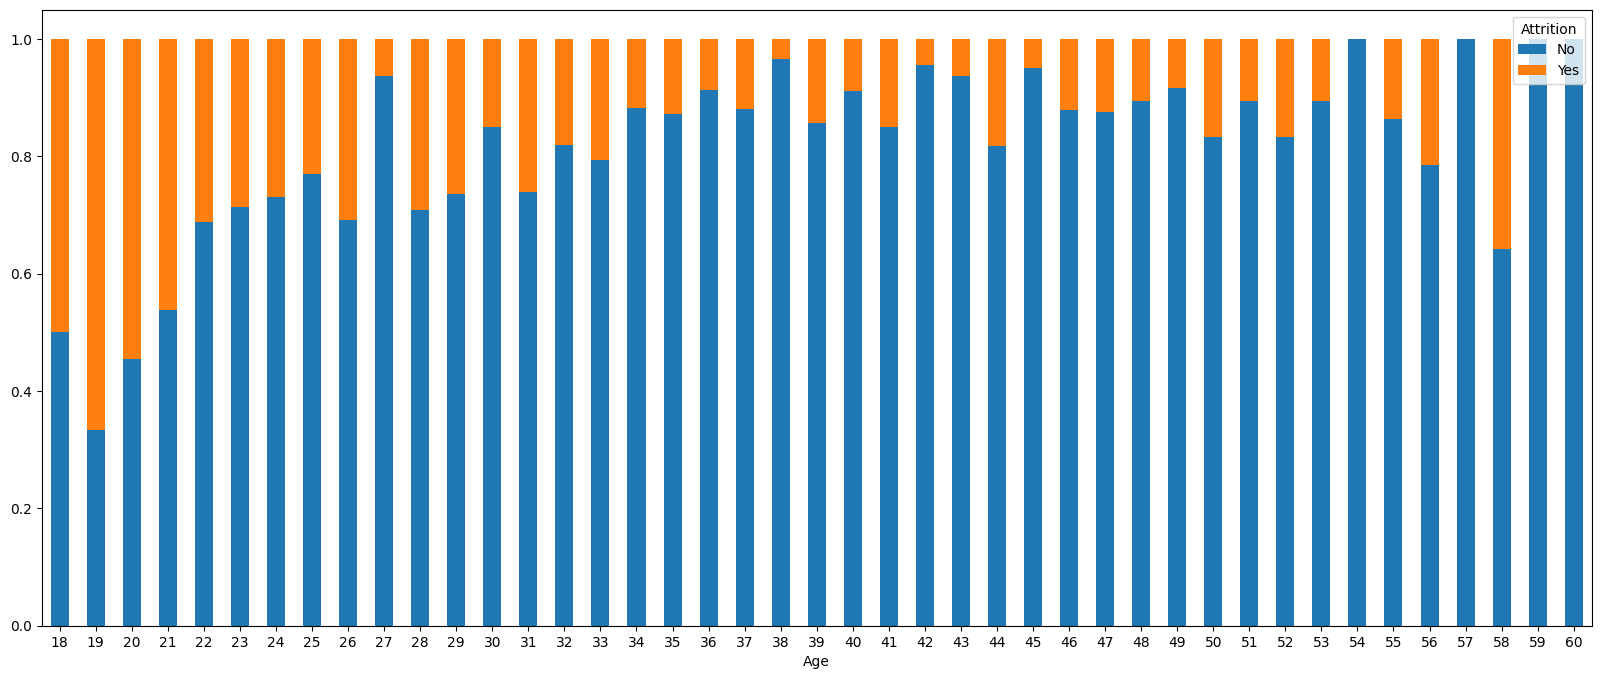

In [ ]:
Age_Target = pd.crosstab(df['Age'],df['Attrition'])
Age_Target.div(Age_Target.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=True,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

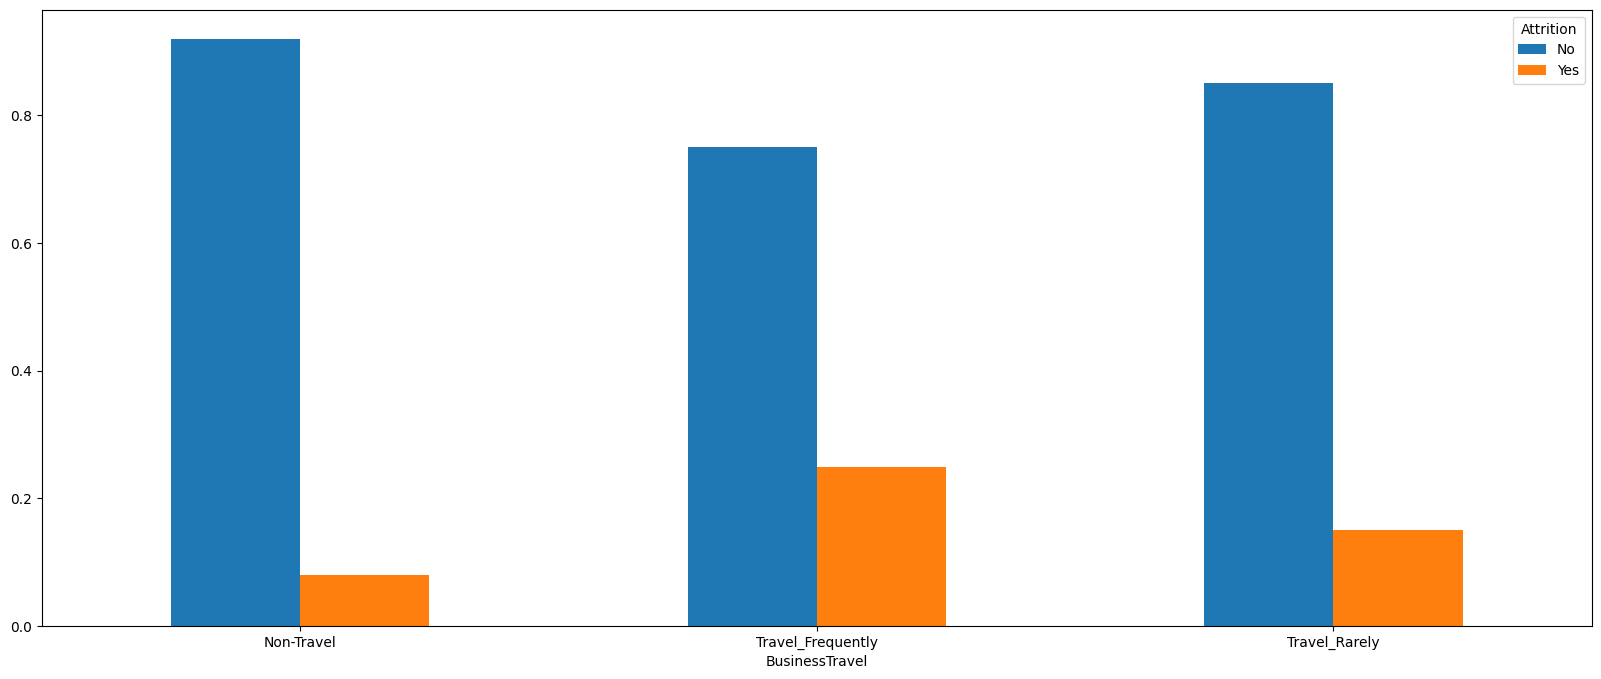

In [ ]:
Gender = pd.crosstab(df['BusinessTravel'],df['Attrition'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

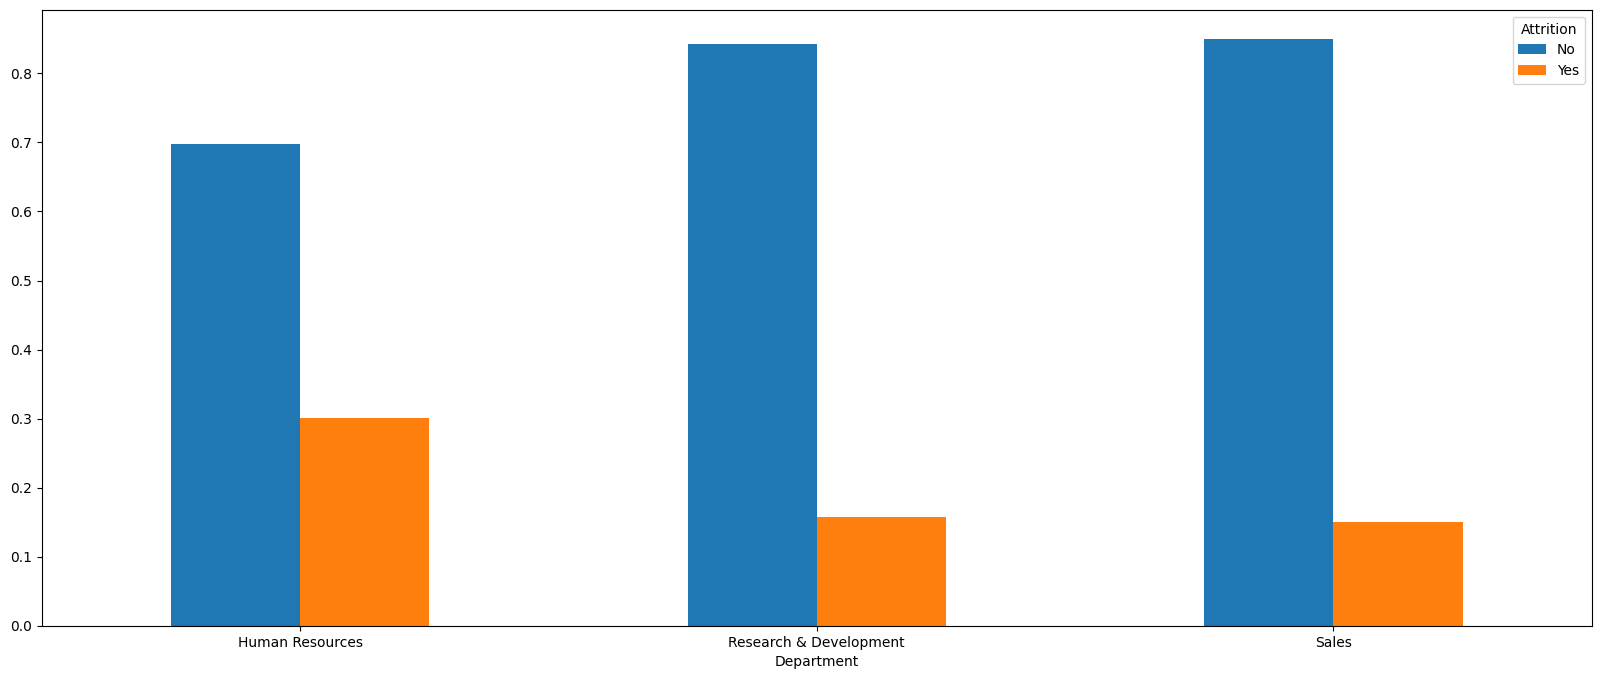

In [ ]:
Department = pd.crosstab(df['Department'],df['Attrition'])
Department.div(Department.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

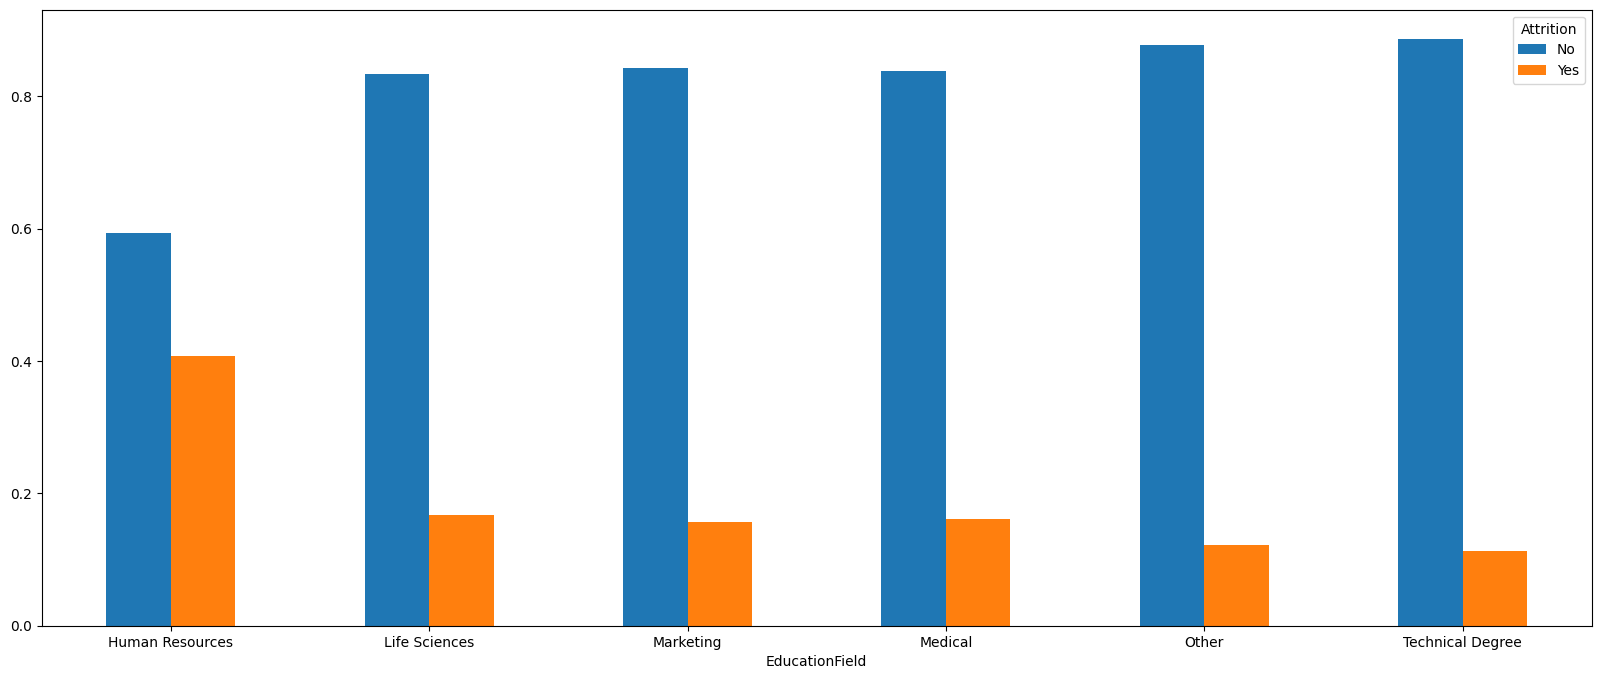

In [ ]:
Field = pd.crosstab(df['EducationField'],df['Attrition'])
Field.div(Field.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

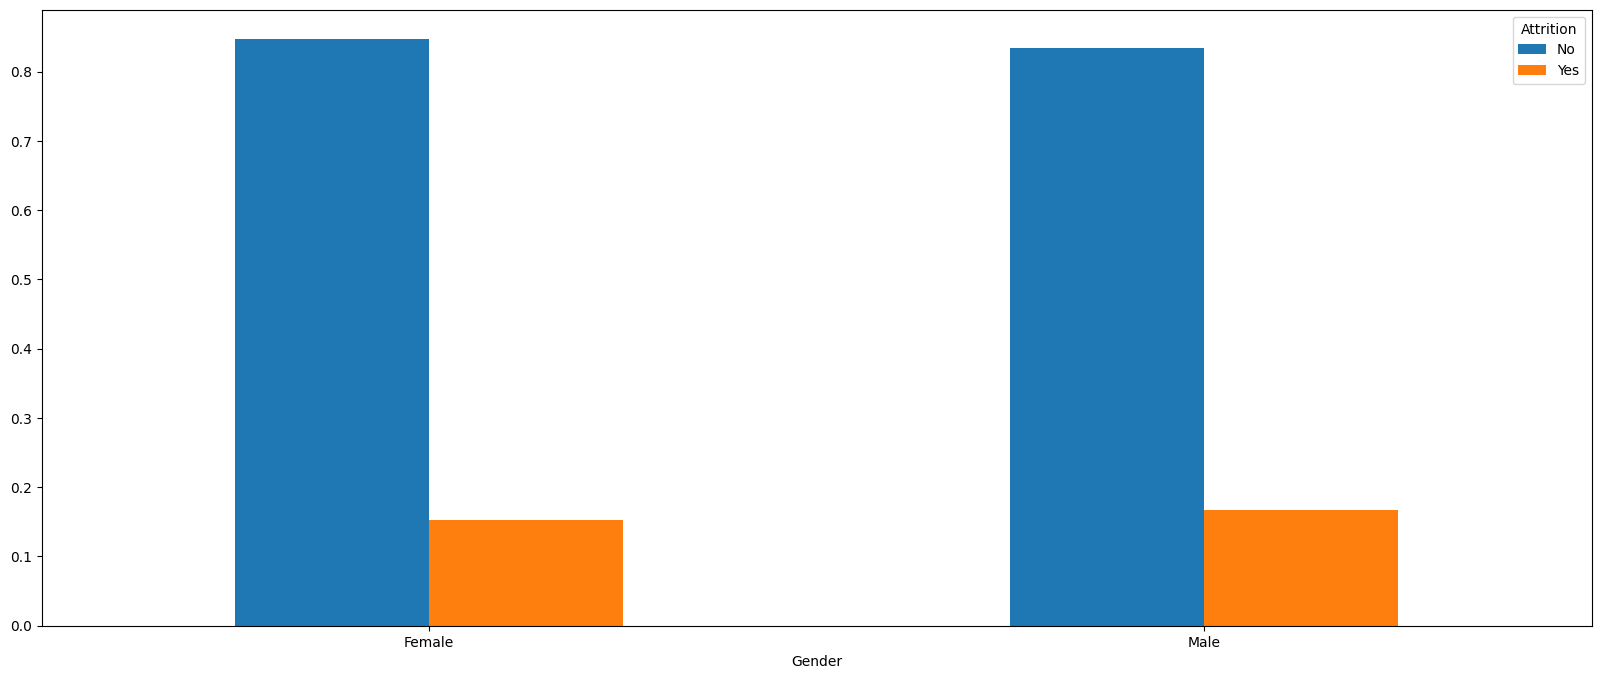

In [ ]:
Gender = pd.crosstab(df['Gender'],df['Attrition'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

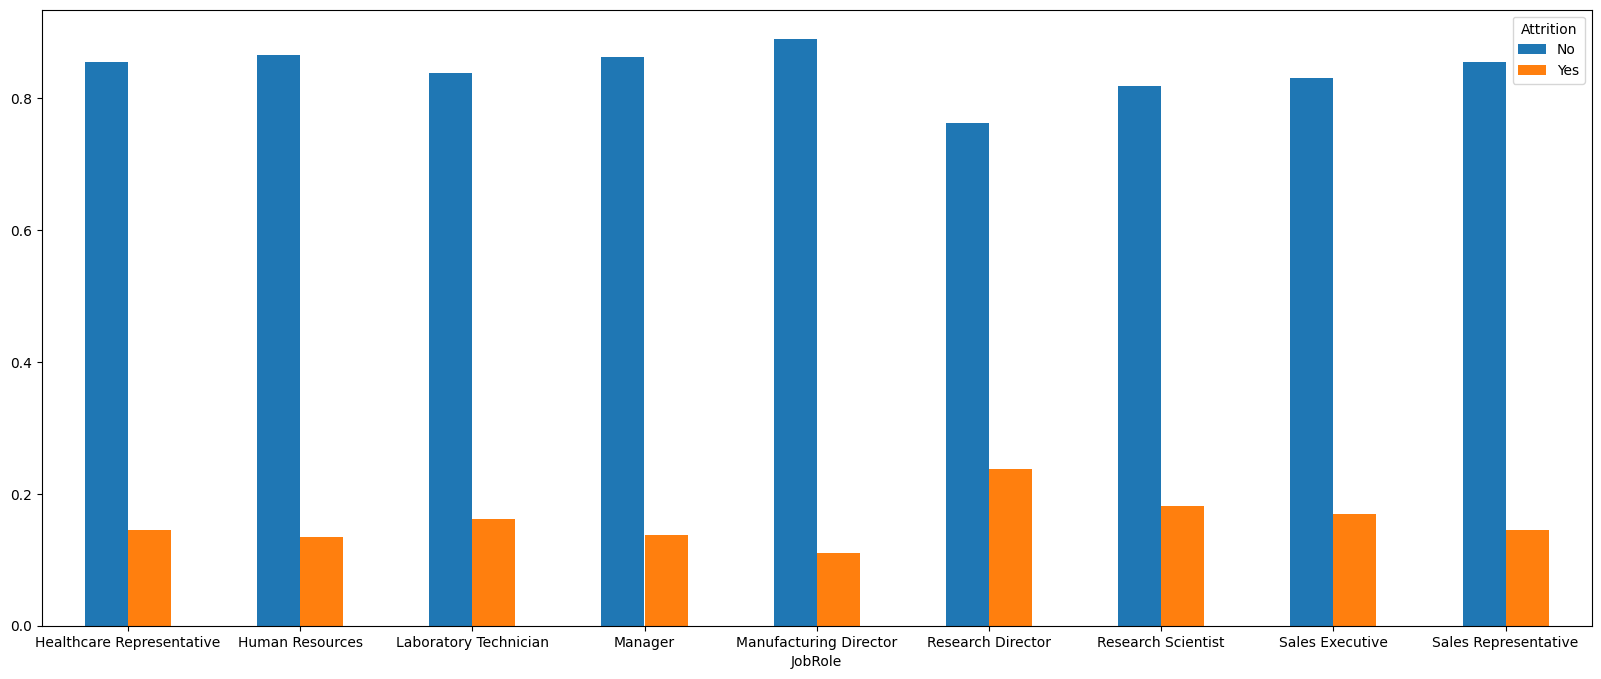

In [ ]:
Role = pd.crosstab(df['JobRole'],df['Attrition'])
Role.div(Role.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

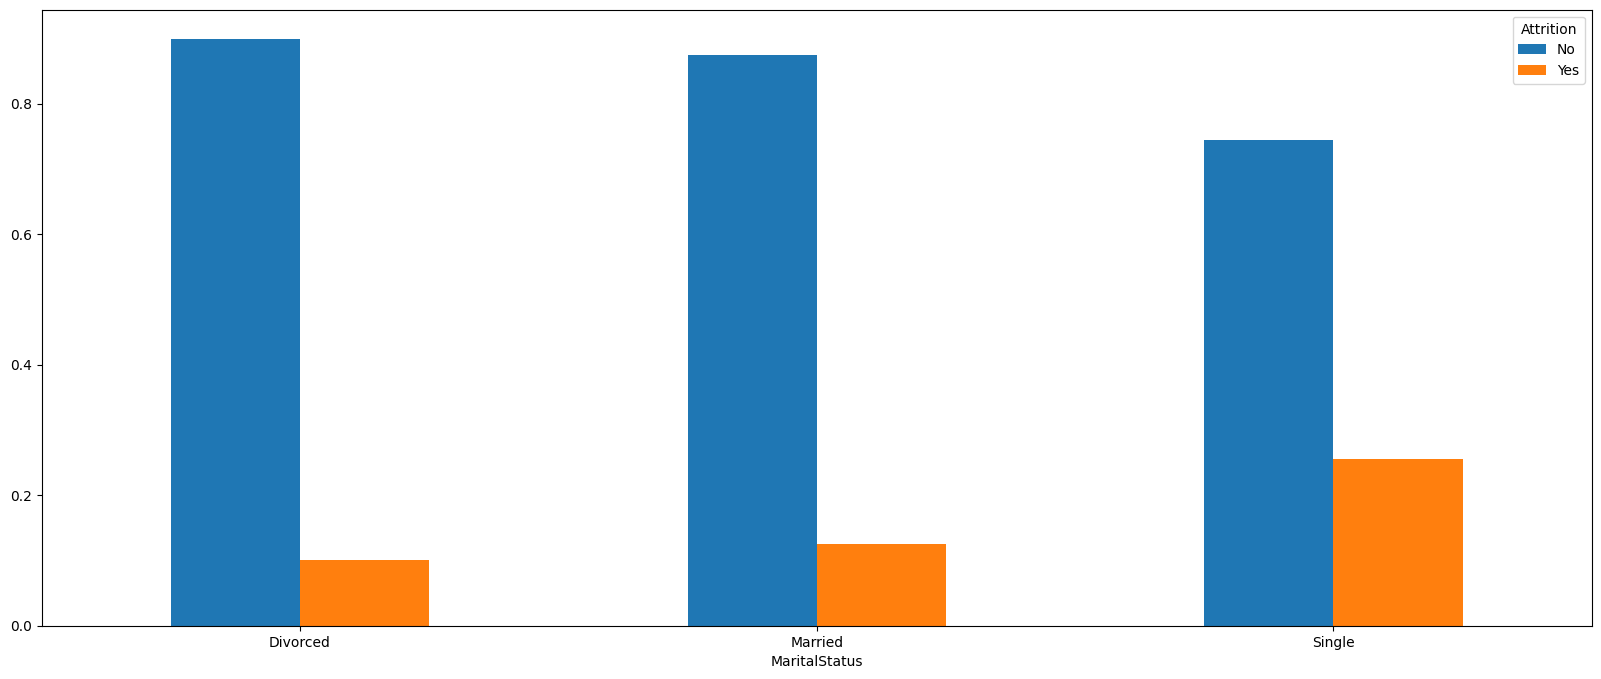

In [ ]:
Marital = pd.crosstab(df['MaritalStatus'],df['Attrition'])
Marital.div(Marital.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

<ipython-input-39-1cc76f3d59b9>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayers["MonthlyIncome"], label="No", shade=True)
<ipython-input-39-1cc76f3d59b9>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(leavers["MonthlyIncome"], label="Yes", shade=True)


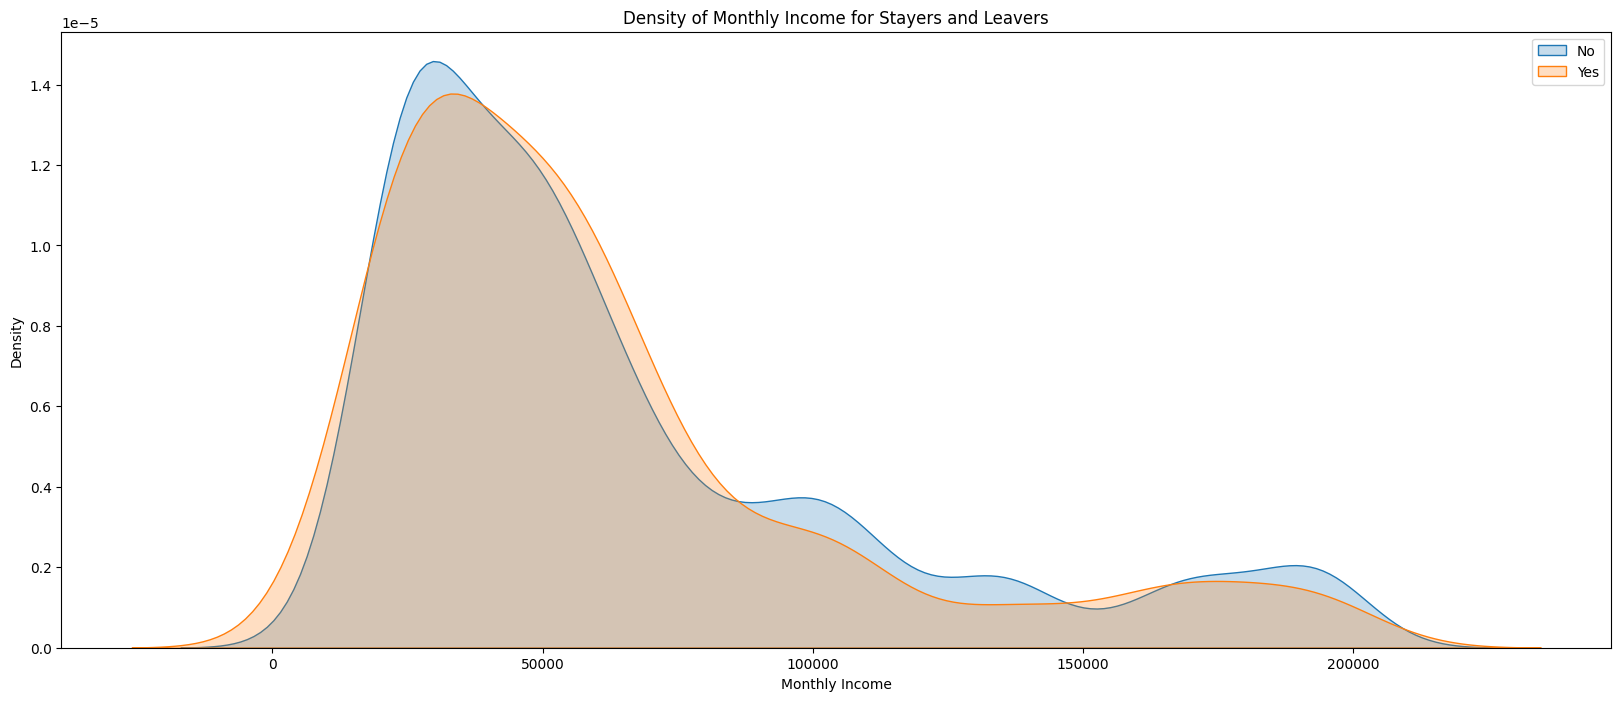

In [ ]:
stayers = df[df["Attrition"] == "No"]
leavers = df[df["Attrition"] == "Yes"]

plt.figure(figsize = (20,8))
sns.kdeplot(stayers["MonthlyIncome"], label="No", shade=True)
sns.kdeplot(leavers["MonthlyIncome"], label="Yes", shade=True)

plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.title("Density of Monthly Income for Stayers and Leavers")
plt.legend()
plt.show();

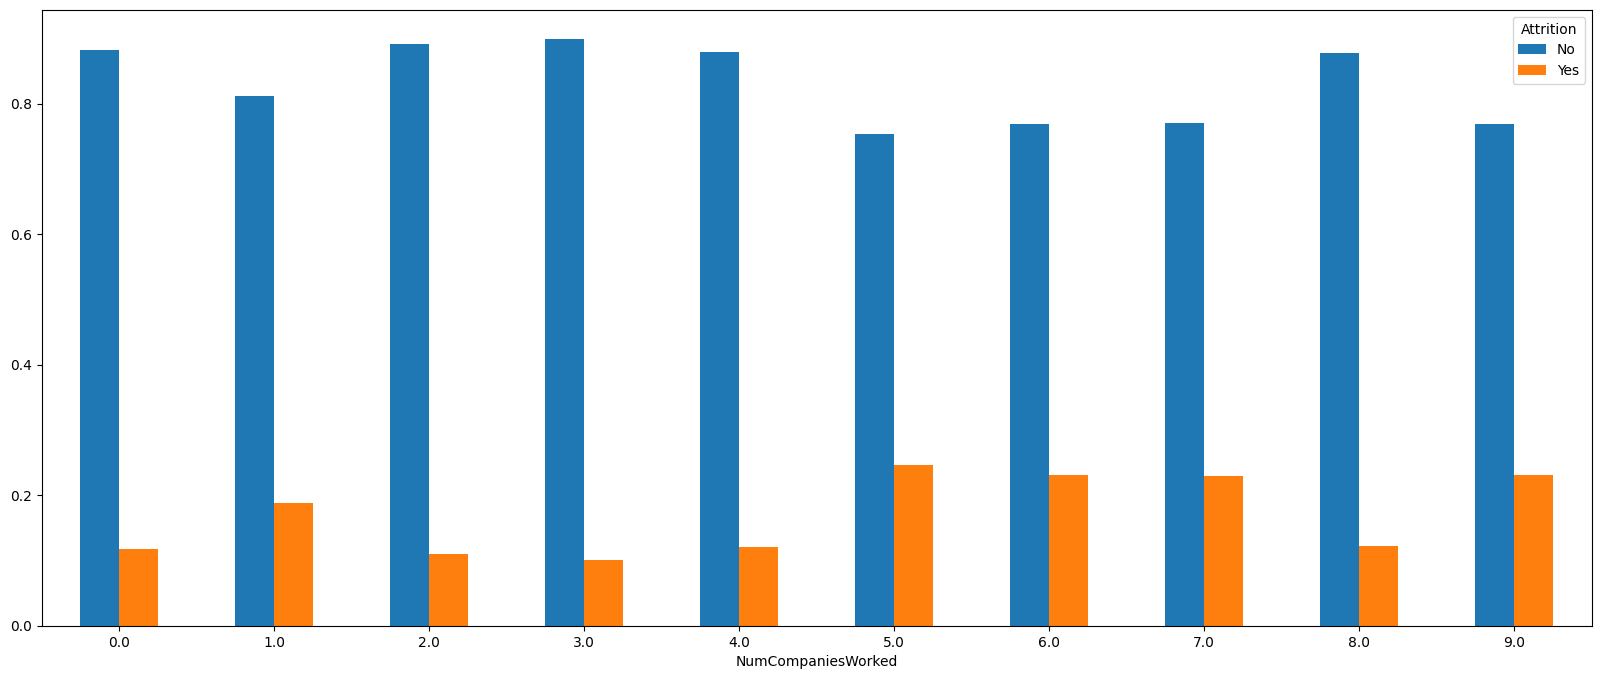

In [ ]:
Companies = pd.crosstab(df['NumCompaniesWorked'],df['Attrition'])
Companies.div(Companies.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

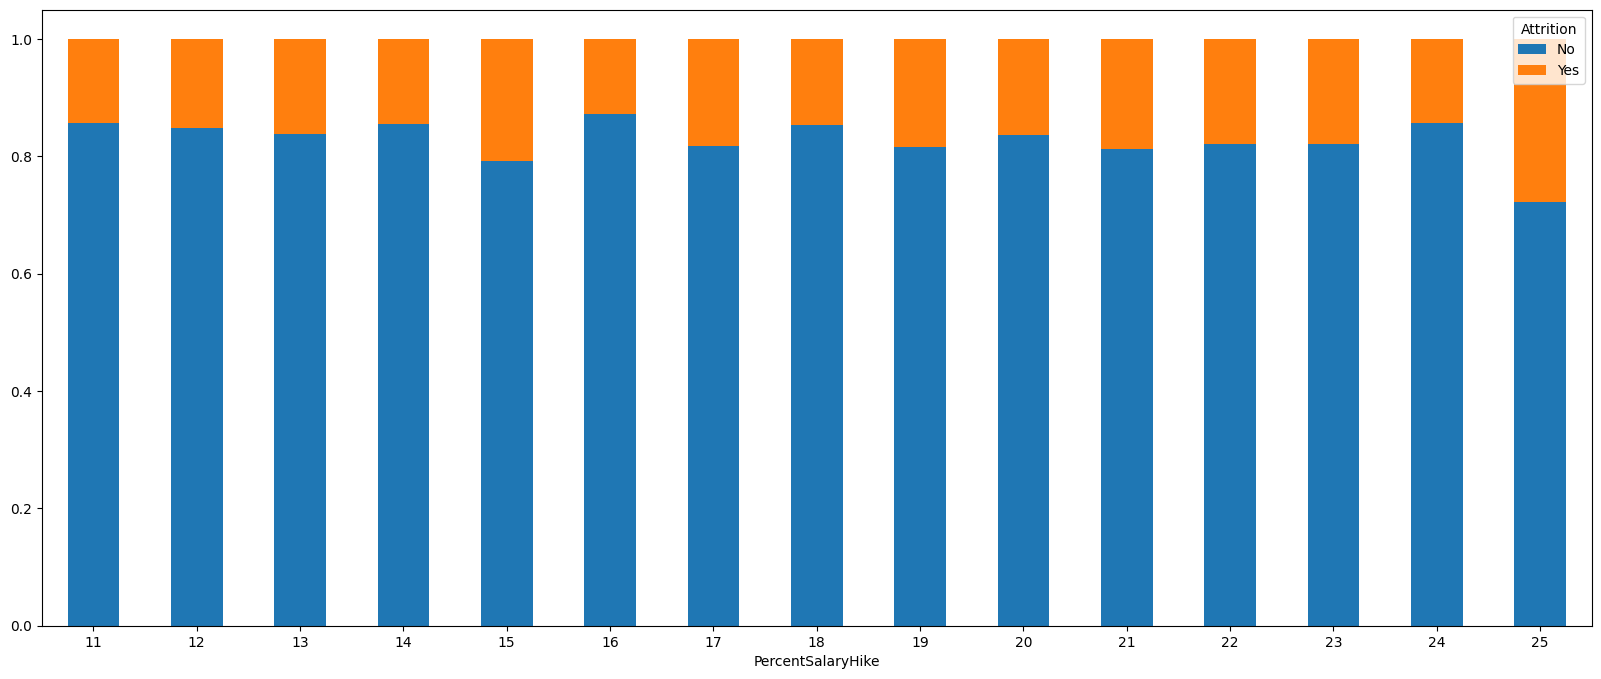

In [ ]:
Salary = pd.crosstab(df['PercentSalaryHike'],df['Attrition'])
Salary.div(Salary.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=True,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

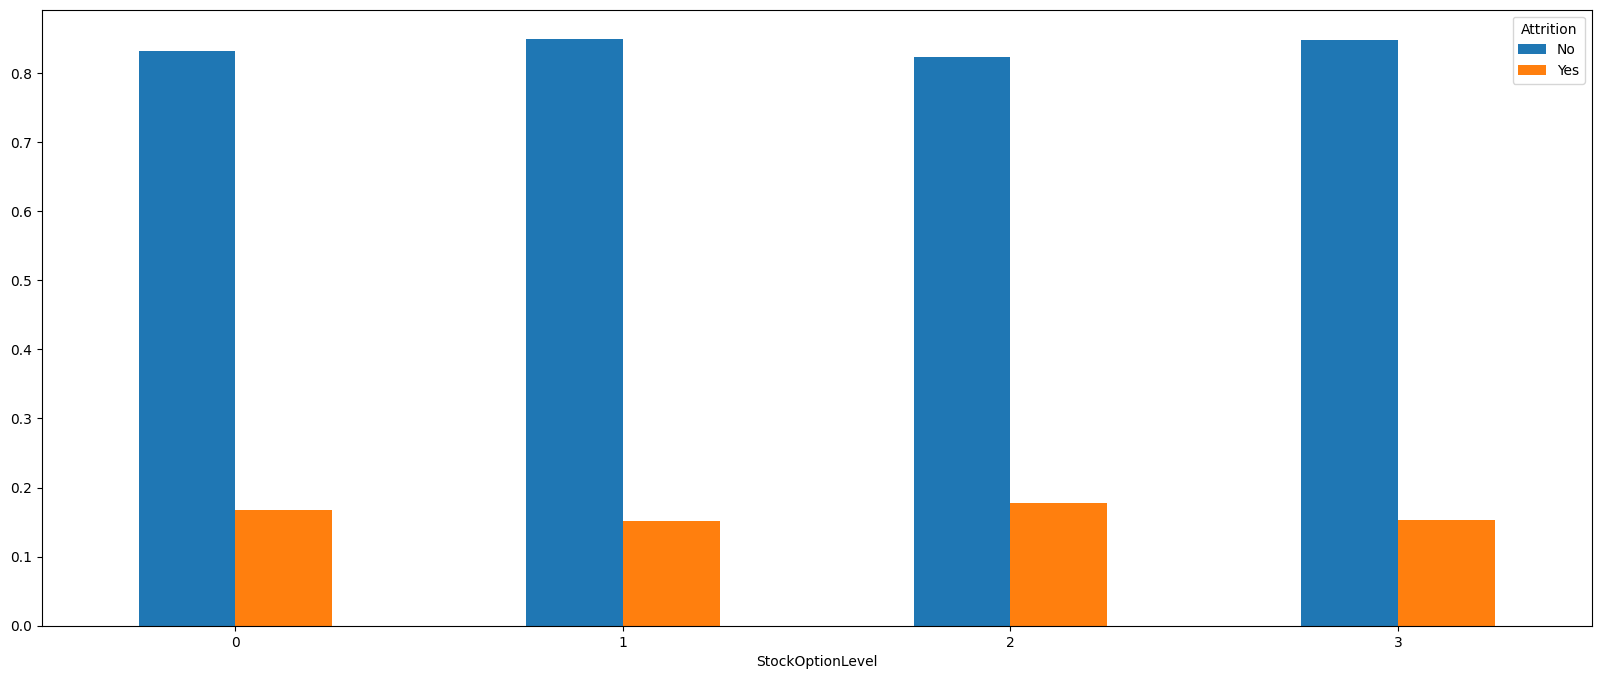

In [ ]:
Stock = pd.crosstab(df['StockOptionLevel'],df['Attrition'])
Stock.div(Stock.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

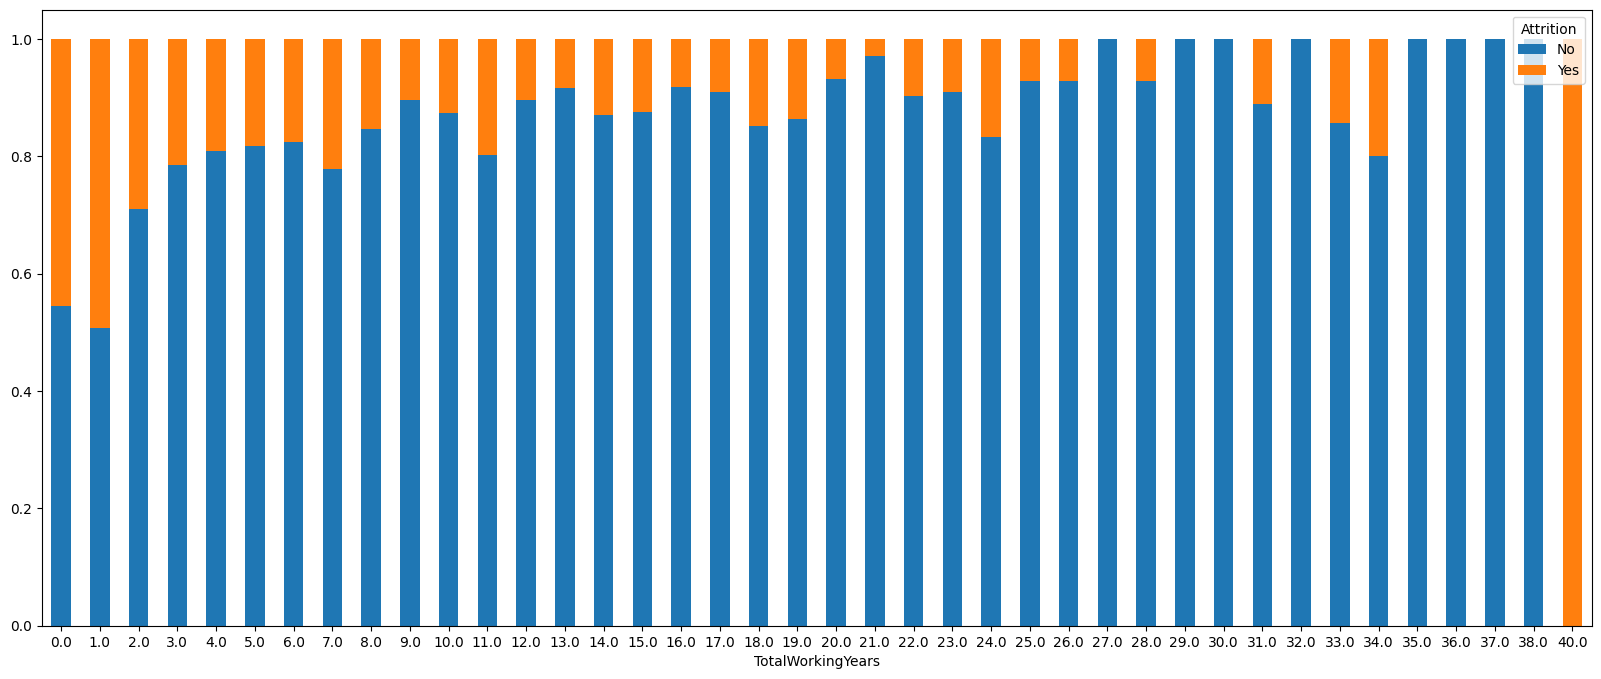

In [ ]:
Working_Years = pd.crosstab(df['TotalWorkingYears'],df['Attrition'])
Working_Years.div(Working_Years.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=True,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

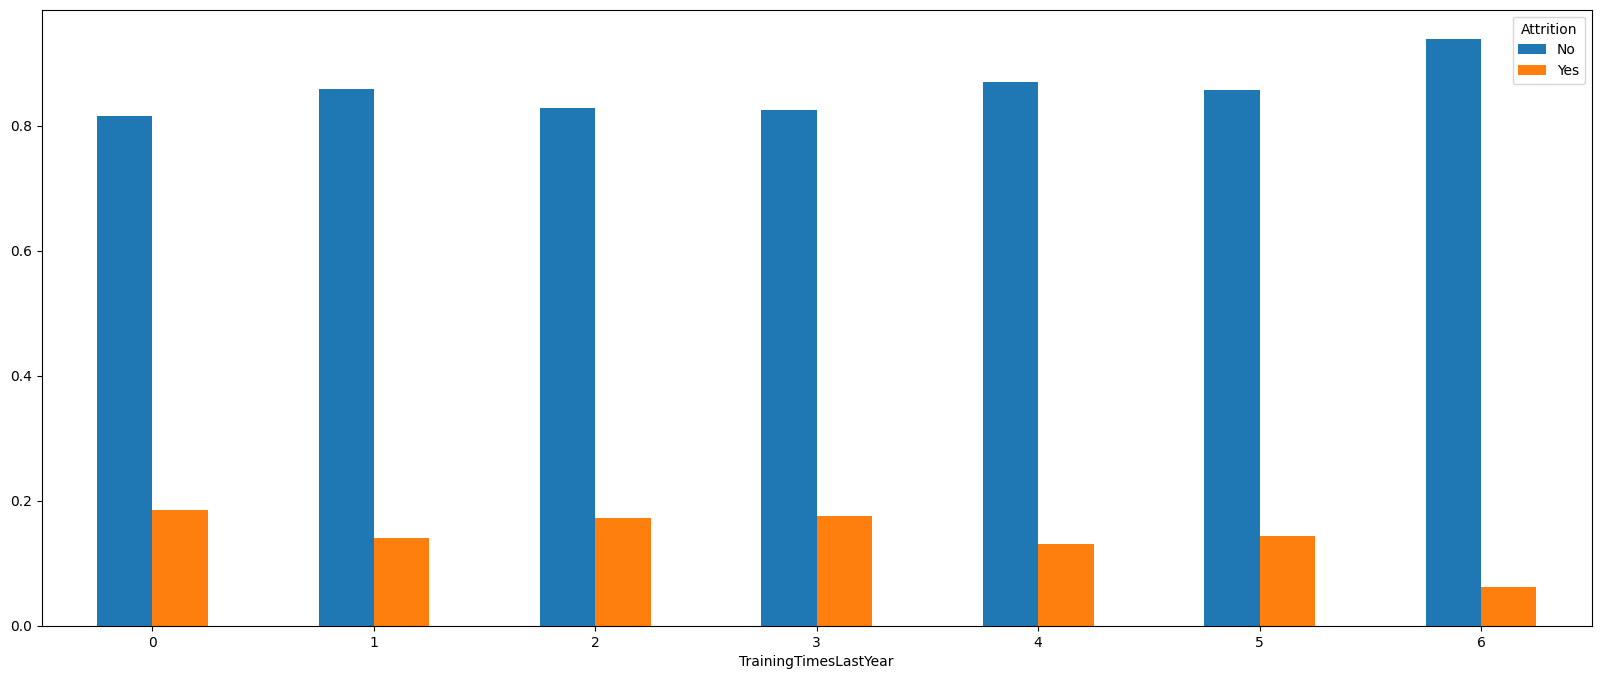

In [ ]:
Training = pd.crosstab(df['TrainingTimesLastYear'],df['Attrition'])
Training.div(Training.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

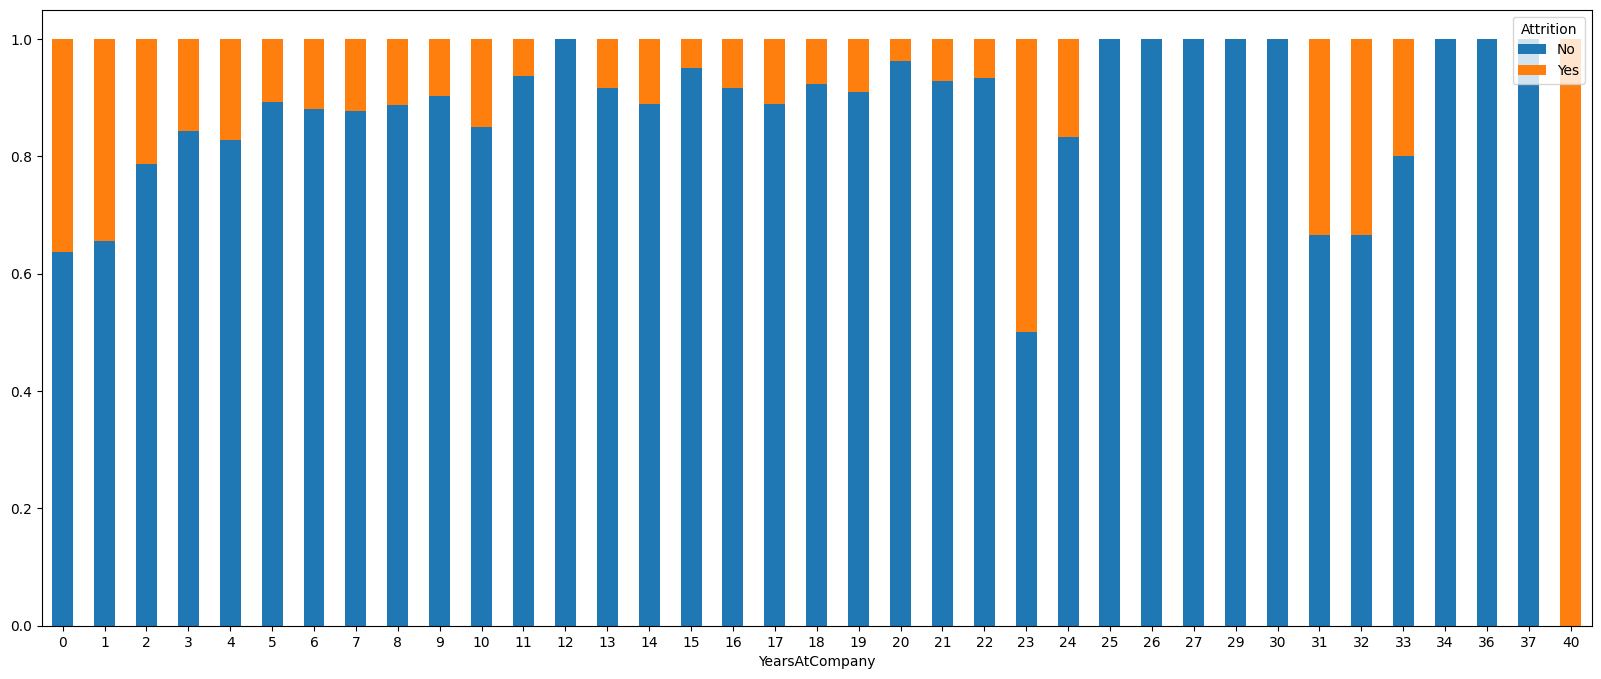

In [ ]:
Years_At_Company = pd.crosstab(df['YearsAtCompany'],df['Attrition'])
Years_At_Company.div(Years_At_Company.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=True,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

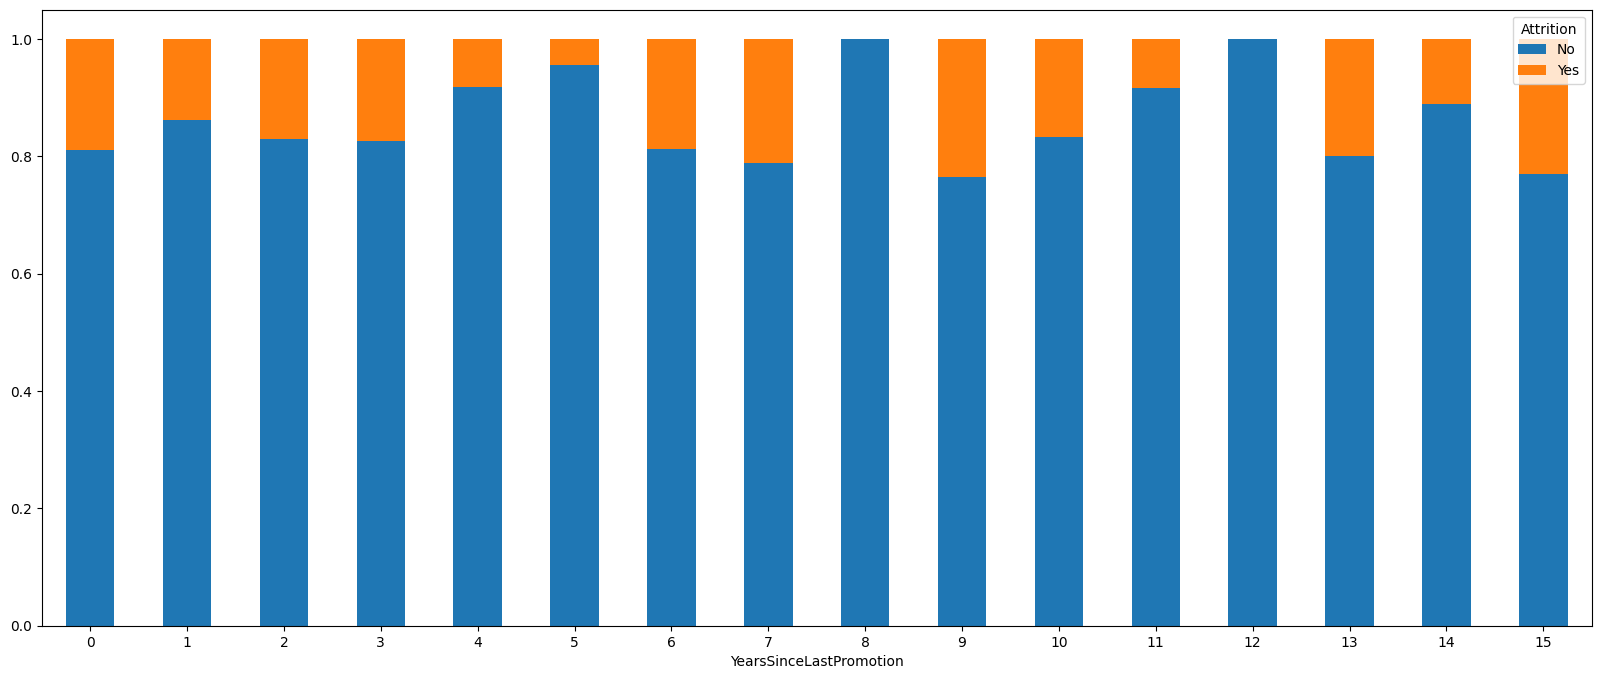

In [ ]:
Promotion = pd.crosstab(df['YearsSinceLastPromotion'],df['Attrition'])
Promotion.div(Promotion.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=True,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

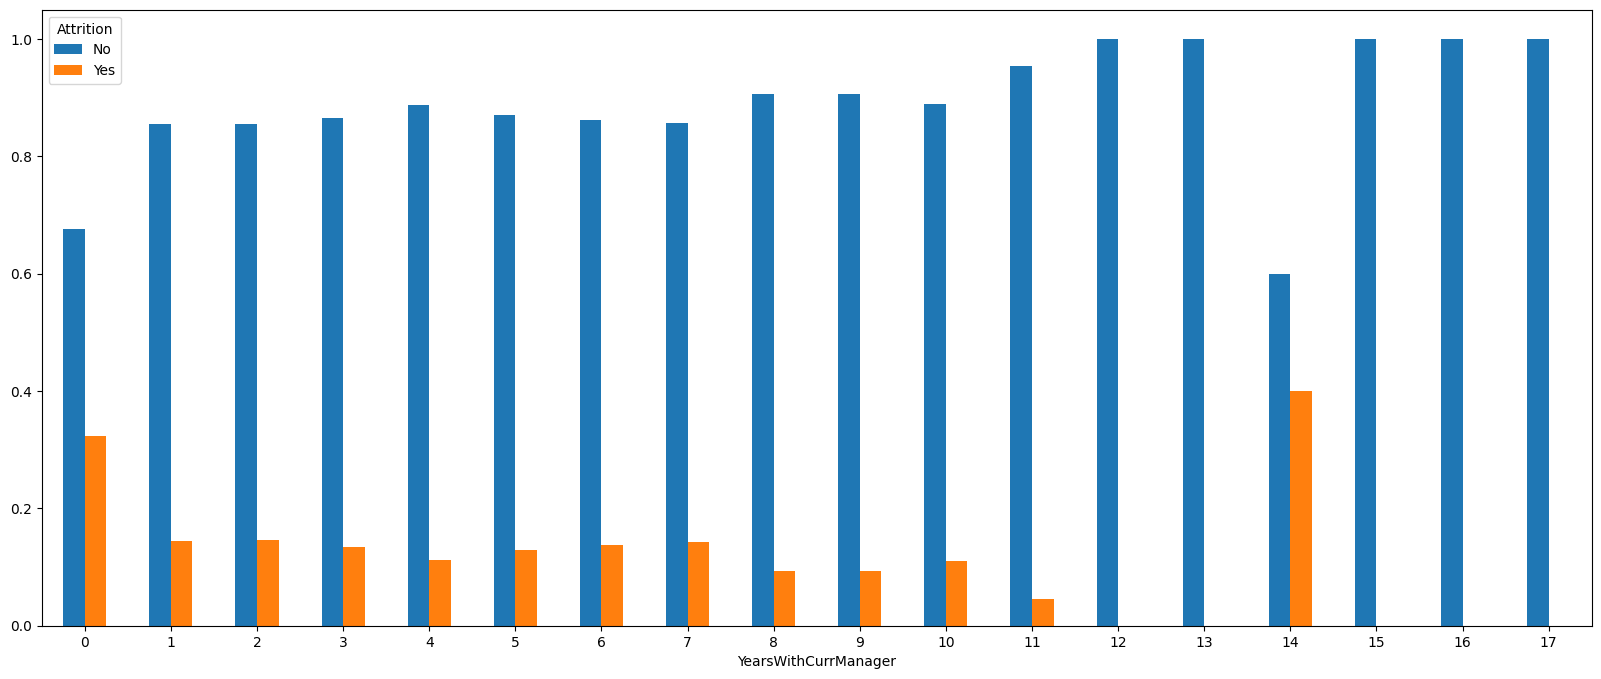

In [ ]:
Curr_Manager = pd.crosstab(df['YearsWithCurrManager'],df['Attrition'])
Curr_Manager.div(Curr_Manager.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

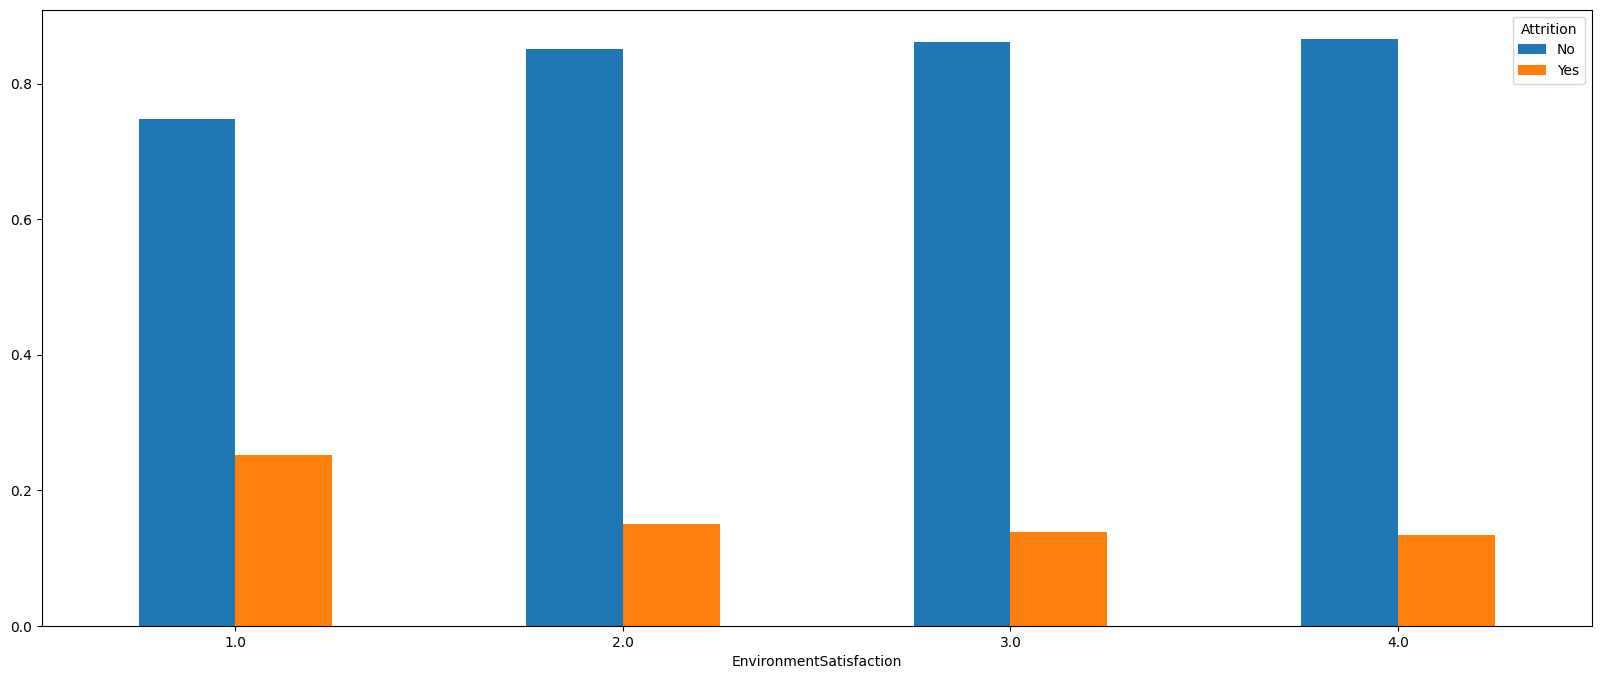

In [ ]:
Environment = pd.crosstab(df['EnvironmentSatisfaction'],df['Attrition'])
Environment.div(Environment.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

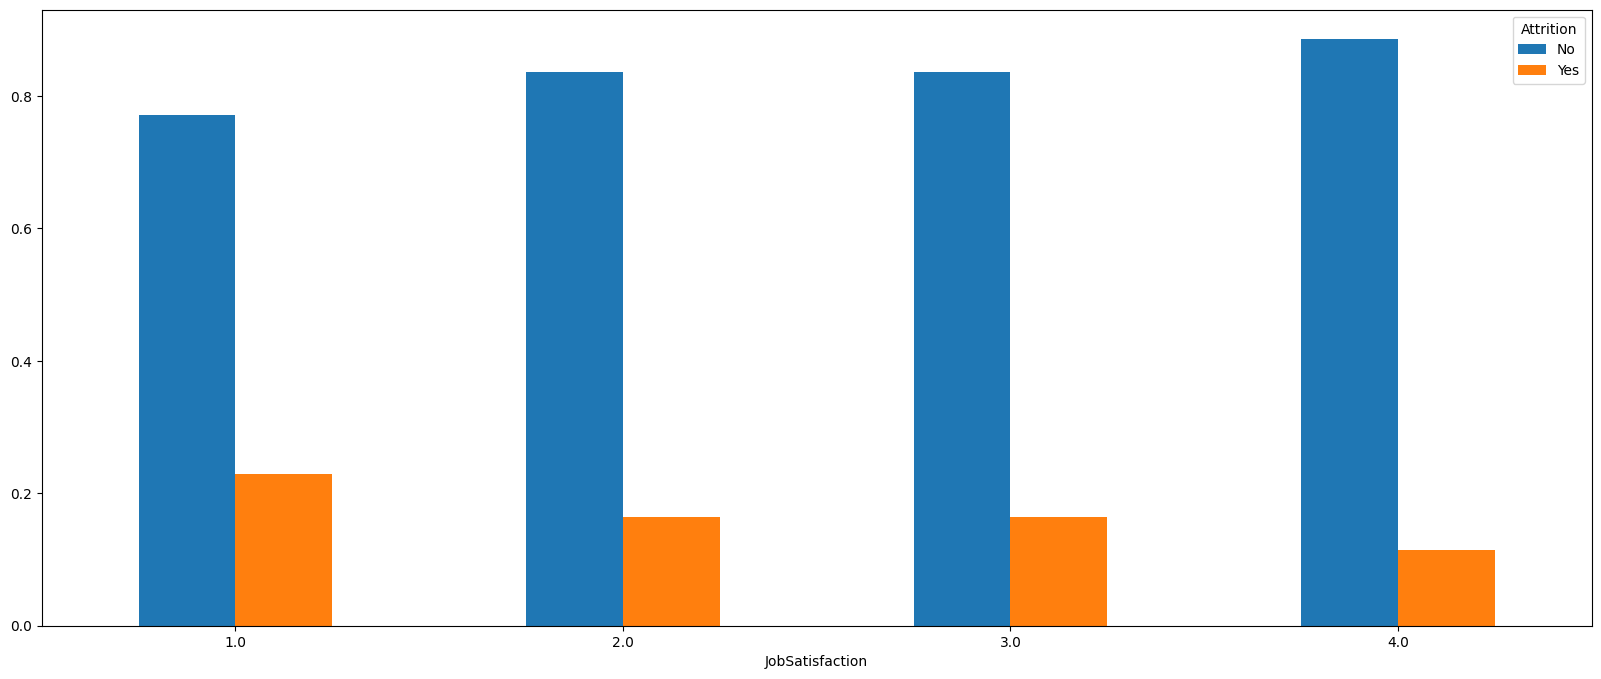

In [ ]:
Job_Satisfaction = pd.crosstab(df['JobSatisfaction'],df['Attrition'])
Job_Satisfaction.div(Job_Satisfaction.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

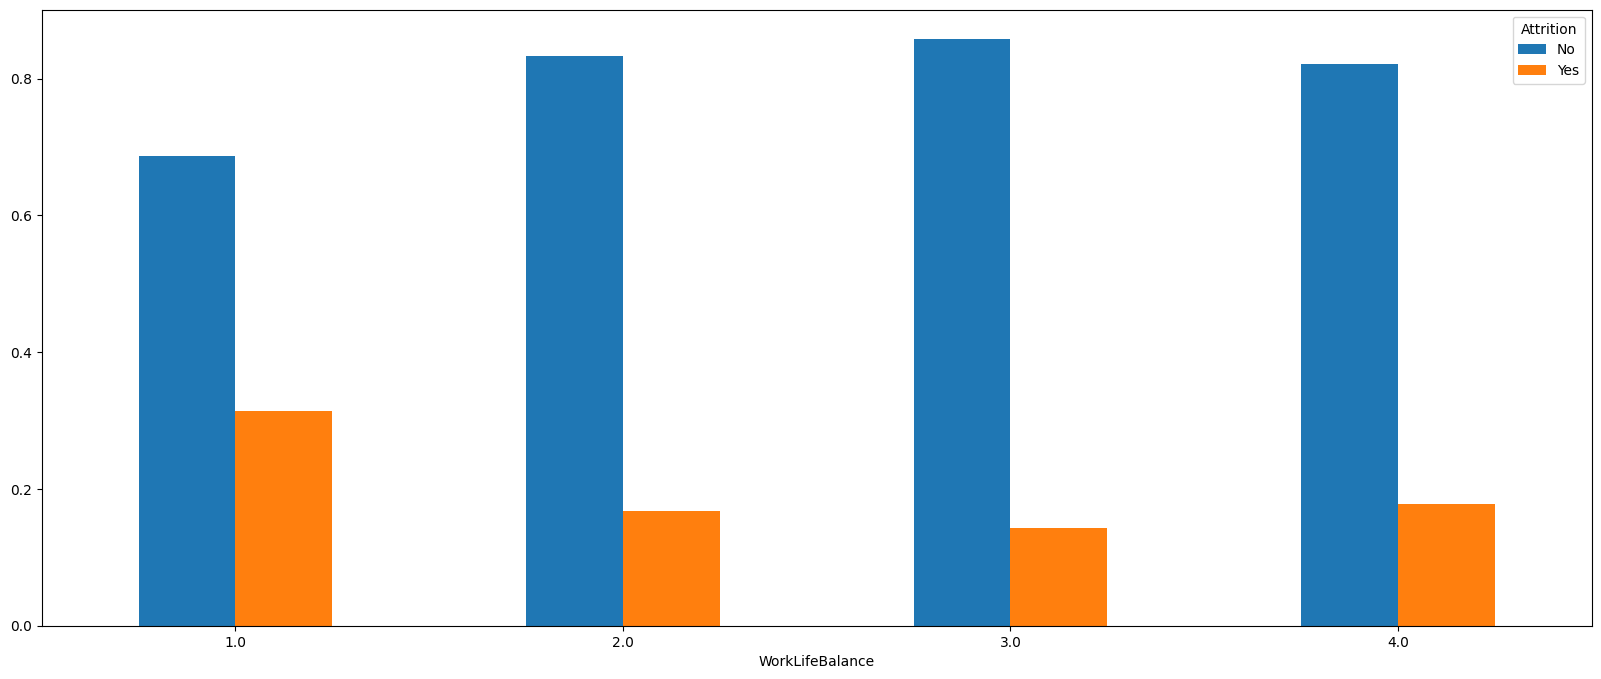

In [ ]:
Working_Life = pd.crosstab(df['WorkLifeBalance'],df['Attrition'])
Working_Life.div(Working_Life.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

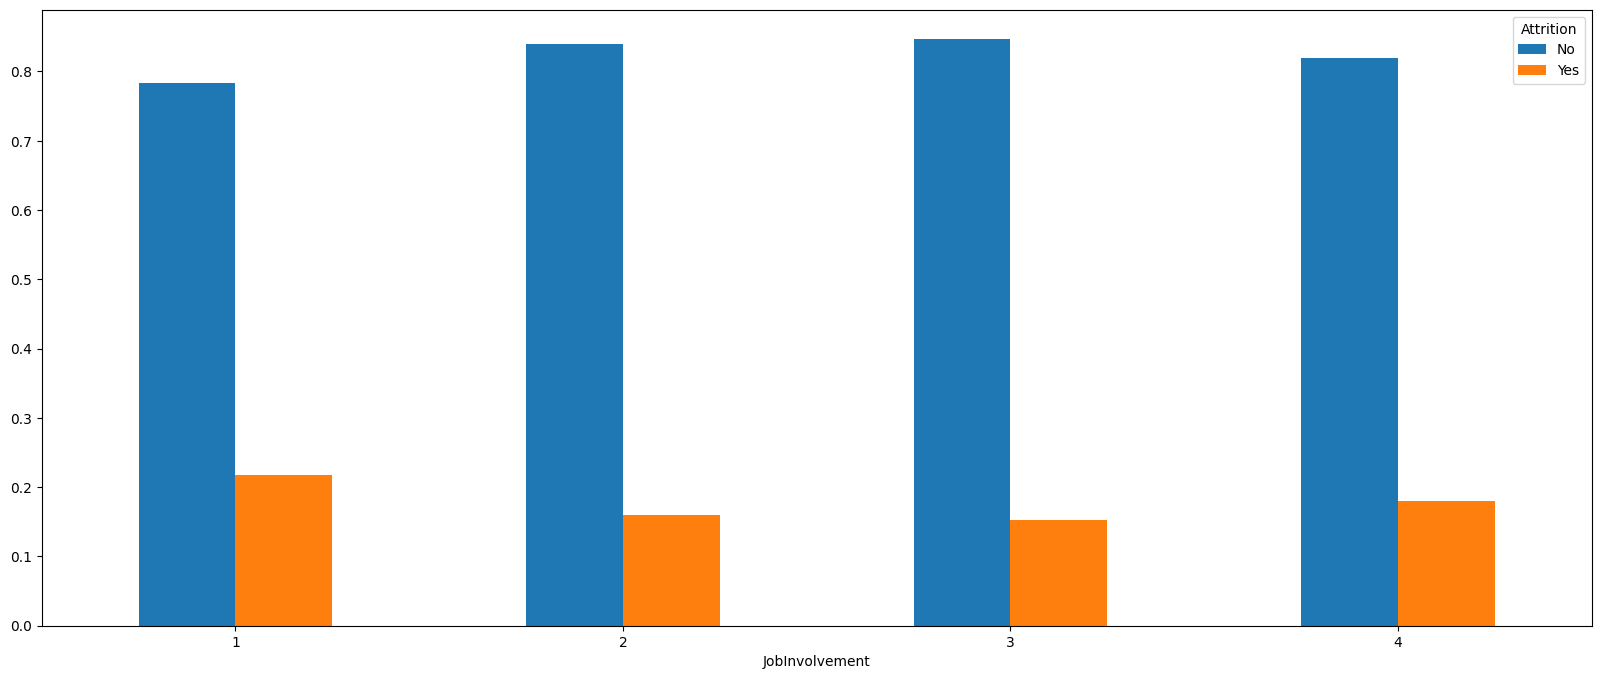

In [ ]:
Job_Involvement = pd.crosstab(df['JobInvolvement'],df['Attrition'])
Job_Involvement.div(Job_Involvement.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

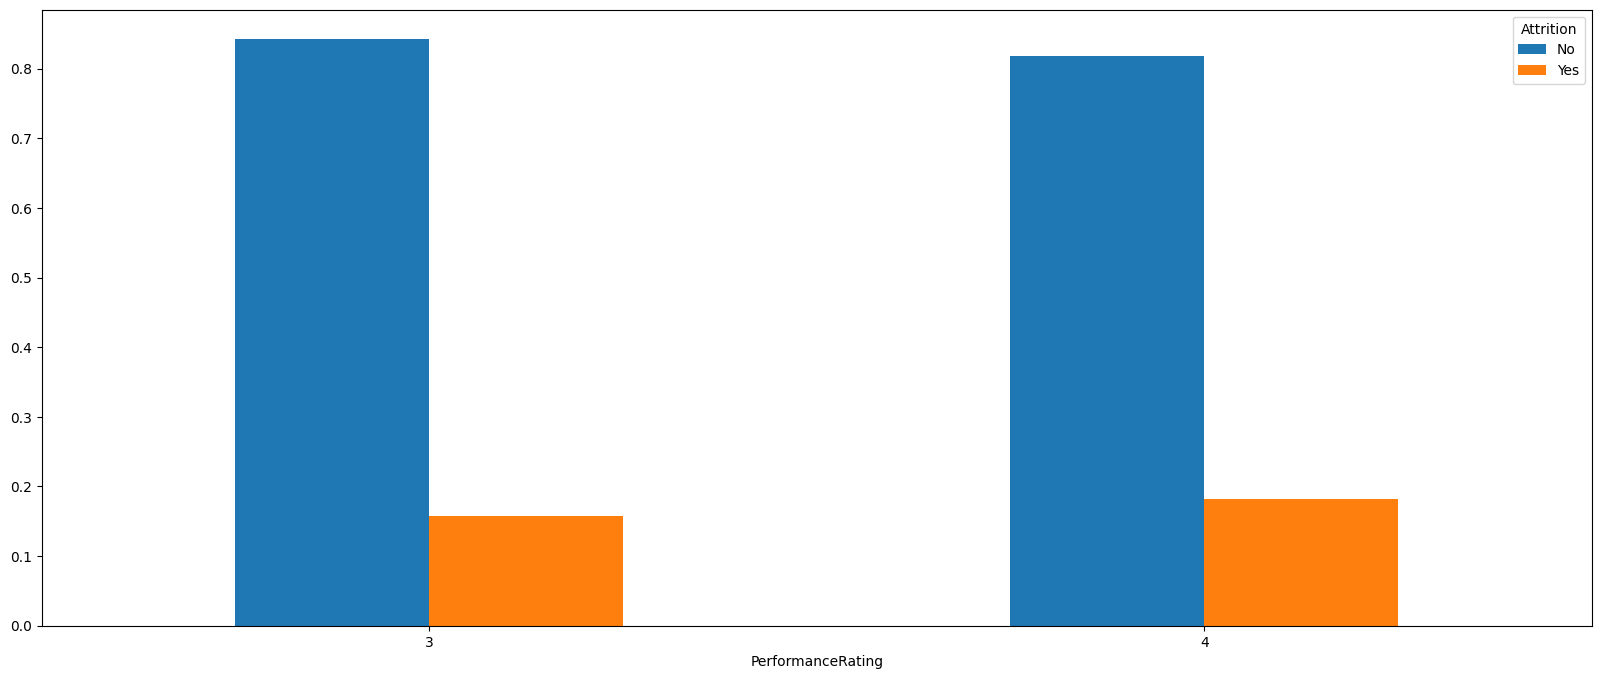

In [ ]:
Performance_Rating = pd.crosstab(df['PerformanceRating'],df['Attrition'])
Performance_Rating.div(Performance_Rating.sum(1).astype(float), axis=0).plot(
    kind='bar',stacked=False,figsize=(20, 8))
plt.xticks(rotation=0, ha='center')
plt.show()

**PROJECT BY-** ASTER NATHAN